In [3]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import exp_params
from qutip import *
from helpers.targets import *
import qutip as qt

# from estimation import *
import matplotlib as mpl

# Setting some npz paths, colors, and standards

In [4]:
cm = 1 / 2.54
markersize = 5
linewidth = 1

fontname = "Calibri"
mpl.rc("font", family=fontname, size=8)

wigner_colors = ["#1F84FF", "white", "#FF184C"]  # indigo to red/pink
wigner_custom_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "bwr", wigner_colors, N=256
)

color_W_corr = "navy"
color_W_norm = "cornflowerblue"  # "#27530A"
color_W = "mediumblue"
color_star_outline = "black"

# # colorblind 3
color_Q = "#8344FF"

color_W_norm = "#FF743E" #"#FF803E"
color_W_corr = "#FFCE13"

Q_linewidth = 1
W_linewidth = 0.5
sim_linewidth = 0.8


Q_markersize = 5
W_markersize = 4.5
W_markeredgewidth = 1.5

label_fontsize = 8

half_width_dims = (8.6 * cm, 6 * cm)

W_exp_directory = r"results_dimensions\exp\W"

W_exp_T2_directory = r"results_t2\exp\W"

Q_exp_directory = r"results_dimensions\exp\Q\minimal"

Q_exp_T2_directory = r"results_t2\exp\Q"

save_figs_path = r"figs"

# Figure 2: Coherent error

### Data and scaling

In [5]:
### parity exp data
# corrected
parity_selection_scaling = np.array(
    [
        0.949408241429967,
        -0.9530942201409625,
        0.9367058399922237,
        -0.8706398160776995,
        0.7987604102446765,
        -0.6459226622546143,
        0.507936025983085,
        -0.26464164166473114,
    ]
)
err_selection_scaling = np.array(
    [
        0.00910260320461064,
        0.008630045028977702,
        0.009855926885457656,
        0.012590254717320145,
        0.015117662972906109,
        0.01849794264204417,
        0.01964116896763655,
        0.02084327849169325,
    ]
)
# normal
normal_pe_selection_scaling = np.array(
    [
        0.9737422320320783,
        0.021415262643411488,
        0.9633022393211238,
        0.05875728274260252,
        0.8691818703764324,
        0.10342641859163296,
        0.6563044620891225,
        0.21393294700906046,
    ]
)
err_normal_selection_scaling = np.array(
    [
        0.00659401017148393,
        0.005942617629765155,
        0.007121046348751846,
        0.008730736234488405,
        0.011926704928815746,
        0.01068092054613212,
        0.01566120724520193,
        0.013056702602426966,
    ]
)
# inverse
inversed_pe_selection_scaling = np.array(
    [
        0.024333990602111263,
        0.974509482784374,
        0.02659639932890016,
        0.929397098820302,
        0.07042146013175585,
        0.7493490808462472,
        0.1483684361060375,
        0.4785745886737916,
    ]
)
err_inversed_selection_scaling = np.array(
    [
        0.006275062944620904,
        0.006258032670782976,
        0.006813955801912357,
        0.009071315155521462,
        0.009289641720935127,
        0.015102708971425254,
        0.011853358428651501,
        0.01624699281202707,
    ]
)

# normal parity formula
w_pihalf_formula = np.array(
    [
        1.0,
        -0.98965101,
        0.94220534,
        -0.94483267,
        0.64882151,
        -0.94906086,
        0.02208033,
        -0.9839881,
    ]
)
# corrected parity formula
w_2pi_formula = np.array(
    [
        1.0,
        -0.98885806,
        0.95406322,
        -0.89118013,
        0.79383381,
        -0.65906148,
        0.49468457,
        -0.32204025,
    ]
)
# normal parity simulations
w_id_k1 = np.array(
    [
        0.94767596,
        -0.93917003,
        0.9023234,
        -0.87403293,
        0.70549464,
        -0.74488099,
        0.26437679,
        -0.60620121,
    ]
)
# corrected parity simulations
w_id_k3 = np.array(
    [
        0.94803555,
        -0.93791902,
        0.90753719,
        -0.85233667,
        0.76267803,
        -0.62441359,
        0.46960624,
        -0.30164078,
    ]
)

###PND exp data
pe_selection_scaling = np.array(
    [
        0.9731570711073957,
        0.9716771580881858,
        0.9651431062987655,
        0.956975967151662,
        0.950233210483806,
        0.9348041311676716,
        0.9357057789281412,
        0.929733729750203,
    ]
)
err_scaling = np.array(
    [
        0.006276644813245247,
        0.0068474355156779845,
        0.006947960856693954,
        0.00788615317129217,
        0.008189223479532215,
        0.008930711900457435,
        0.008848427675570444,
        0.009392852924916872,
    ]
)
# PND simulation
output_scal = np.array(
    [
        0.97082216,
        0.96440598,
        0.95581262,
        0.9586437,
        0.95428283,
        0.94657232,
        0.95020168,
        0.93781188,
    ]
)

Nfock = np.array([0, 1, 2, 3, 4, 5, 6, 7])

### Plotting

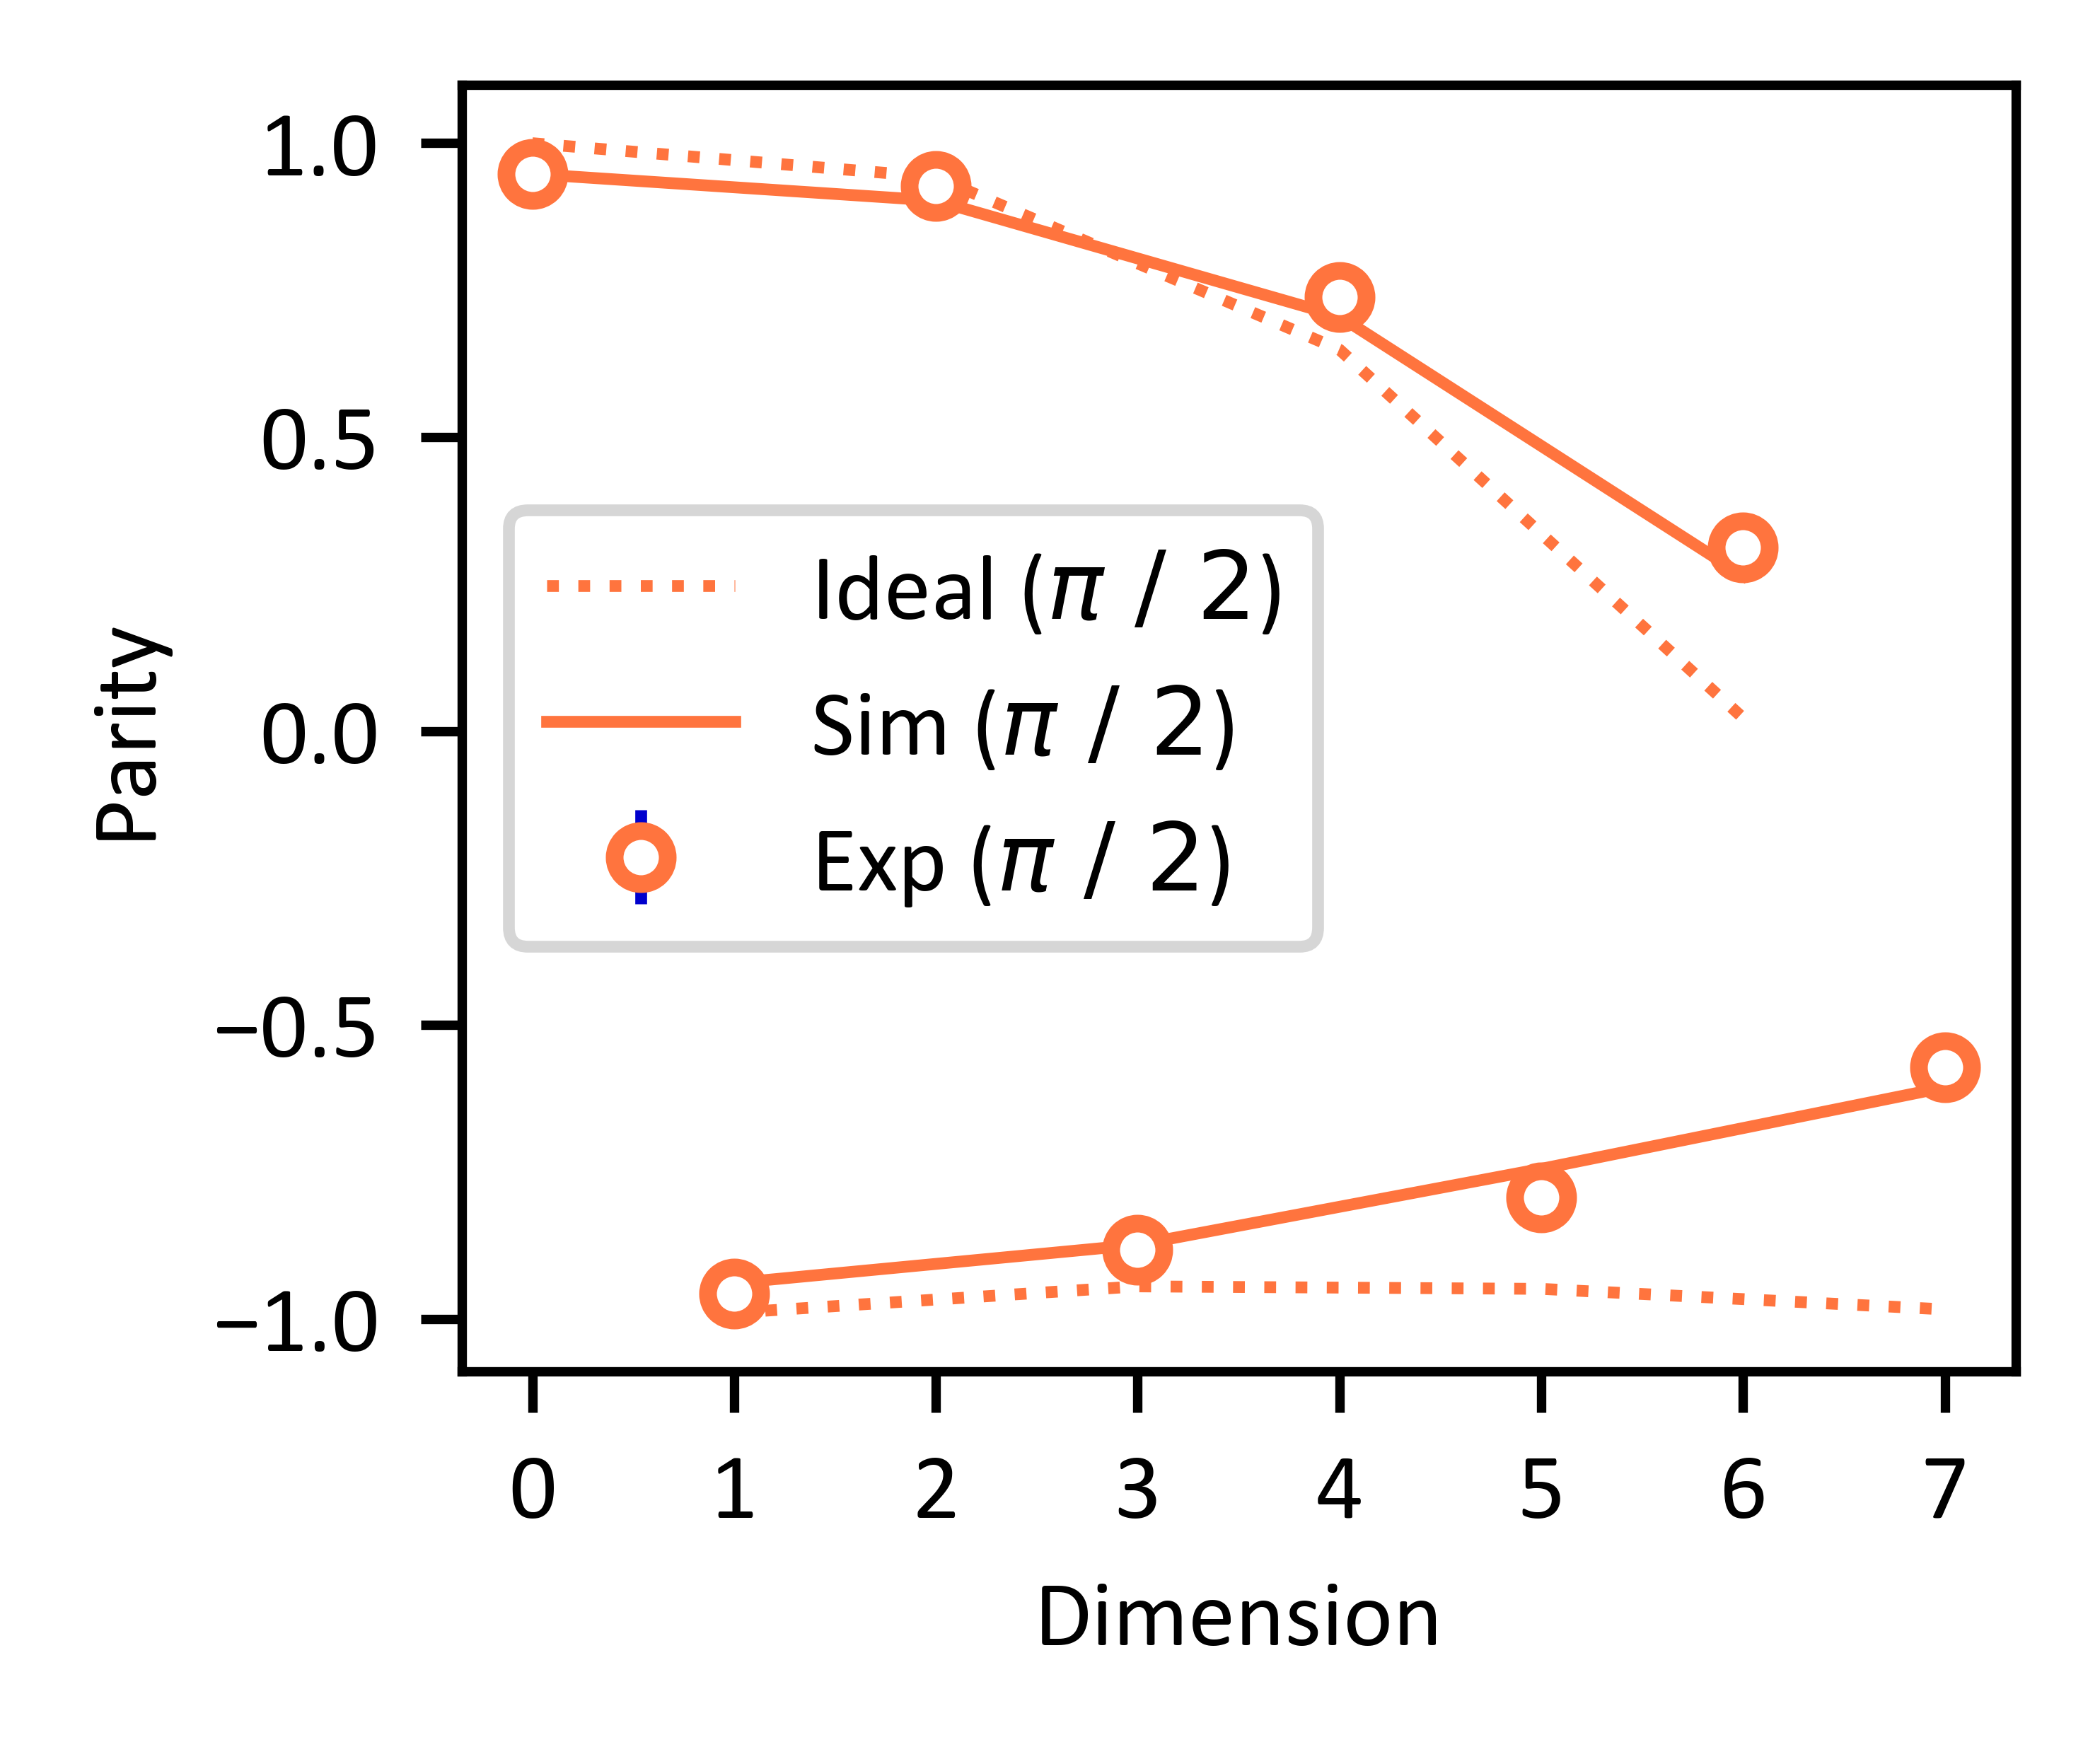

In [8]:
###figure 2b
fg0 = plt.figure(figsize=(6 * cm, 5 * cm), dpi=1200)
plt.tick_params(axis="both", which="major", labelsize=label_fontsize)
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
x_tick_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
plt.xticks(x_ticks, x_tick_labels, fontsize=label_fontsize)

plt.plot(
    Nfock[0::2],
    w_pihalf_formula[0::2],
    ls=":",
    color=color_W_norm,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Ideal ($\pi\ / \ 2$)",
)
plt.plot(
    Nfock[1::2],
    w_pihalf_formula[1::2],
    ls=":",
    color=color_W_norm,
    markersize=markersize,
    linewidth=linewidth,
)

plt.plot(
    Nfock[0::2],
    w_id_k1[0::2],
    ls="-",
    color=color_W_norm,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Sim ($\pi\ / \ 2$)",
)
plt.plot(
    Nfock[1::2],
    w_id_k1[1::2],
    ls="-",
    color=color_W_norm,
    markersize=markersize,
    linewidth=linewidth,
)

plt.errorbar(
    Nfock,
    2 * normal_pe_selection_scaling - 1,
    yerr=err_normal_selection_scaling,
    fmt="o",
    markersize=W_markersize,
    markeredgecolor=color_W_norm,
    markeredgewidth=W_markeredgewidth,
    c="white",
    linewidth=Q_linewidth,
    elinewidth=Q_linewidth,
    ecolor=color_W,
    zorder=12,
    label=r"Exp ($\pi\ / \ 2$)",
)

plt.legend(fontsize=8)
plt.xlabel("$D$")
plt.ylabel("Parity")
plt.show()


fg0.savefig(save_figs_path + "/fig2_normal_parity.pdf", dpi=1200)

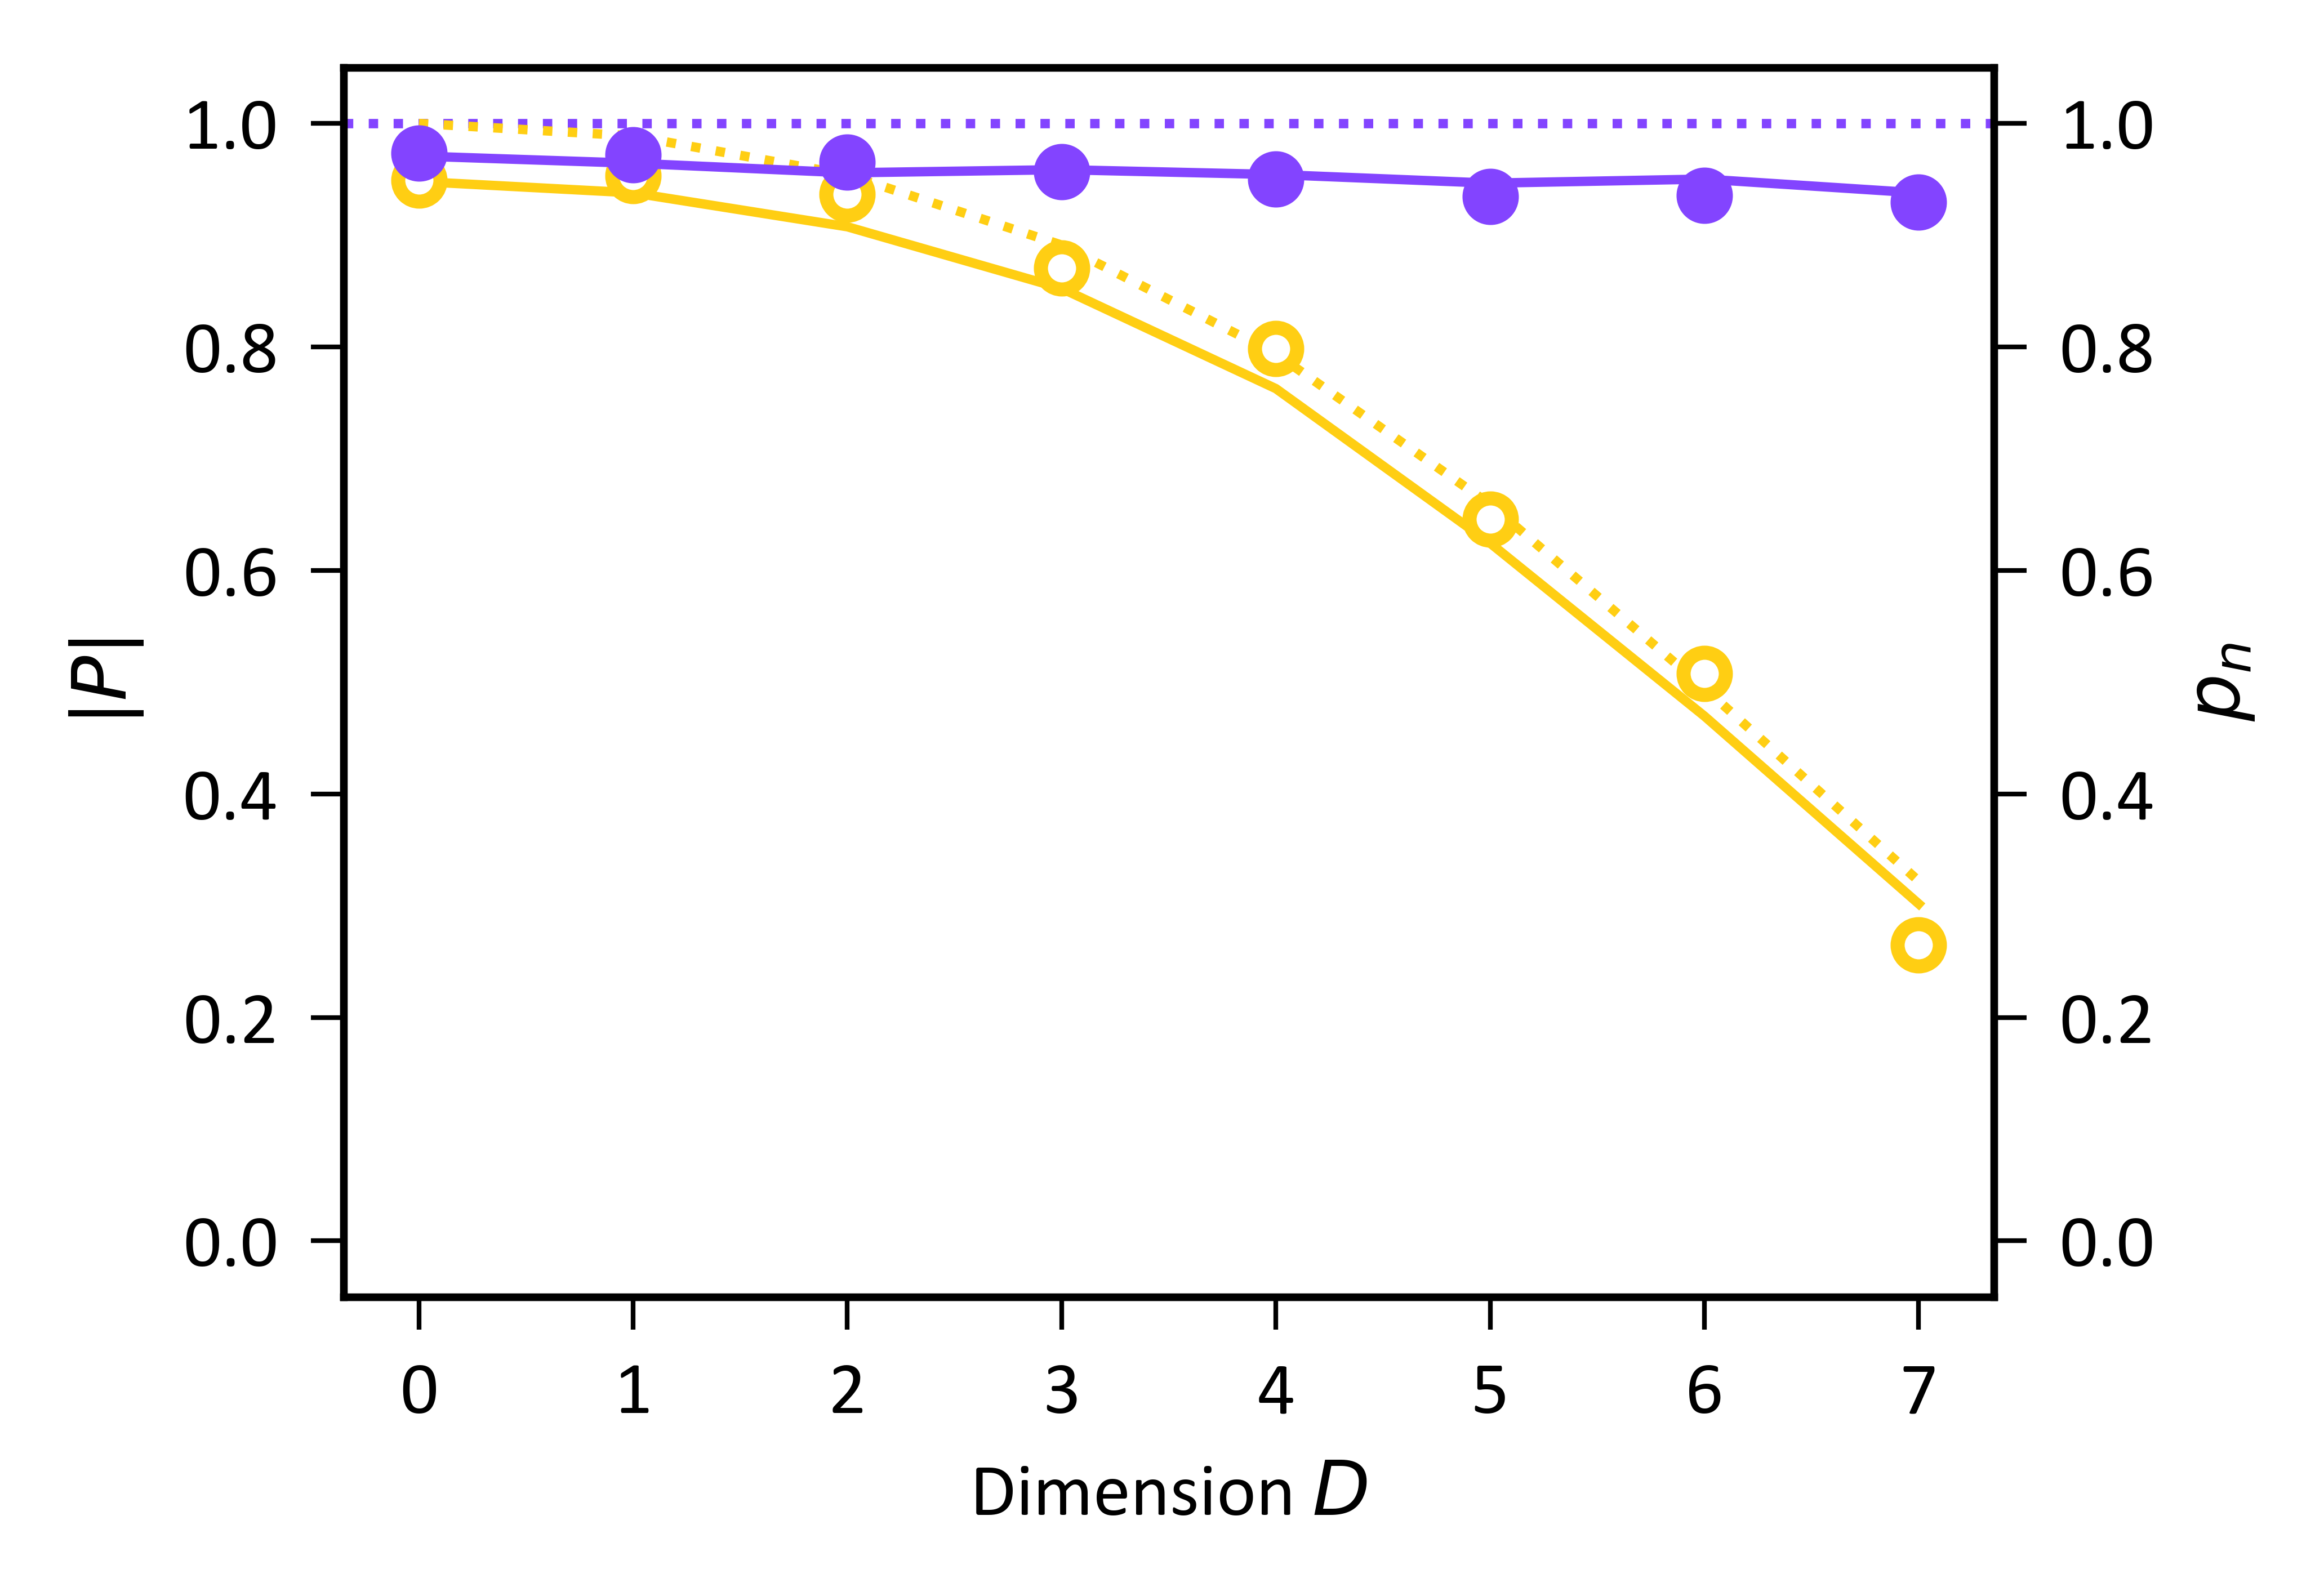

In [11]:
###figure 2c
fg2, ax2 = plt.subplots(figsize=(8 * cm, 6 * cm), dpi=1200)
plt.tick_params(axis="both", which="major")
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
x_tick_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
perfect = 0.97 * np.array([1, 1, 1, 1, 1, 1, 1, 1])
ax2.tick_params(width=0.5)
plt.xticks(
    x_ticks,
    x_tick_labels,
)


plt.axhline(y=1, color=color_Q, linestyle=":", linewidth=Q_linewidth)

ax2.plot(
    Nfock,
    np.abs(w_2pi_formula),
    ls=":",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Ideal W_corrected",
)

ax2.plot(
    Nfock,
    np.abs(w_id_k3),
    ls="-",
    color=color_W_corr,
    markersize=markersize,
    linewidth=linewidth,
    label=r"Sim W_corrected",
)

ax2.errorbar(
    Nfock,
    np.abs(parity_selection_scaling),
    yerr=err_selection_scaling,
    fmt="o",
    markersize=W_markersize,
    markeredgecolor=color_W_corr,
    markeredgewidth=W_markeredgewidth,
    c="white",
    linewidth=Q_linewidth,
    elinewidth=Q_linewidth,
    ecolor=color_W_corr,
    zorder=12,
    label="Exp W_corrected",
)
# ax2.legend(fontsize=8)
ax2.set_ylim([-0.05, 1.05])

ax3 = ax2.twinx()
plt.tick_params(axis="both", which="major", width=0.5)
# ax3.plot(
#     Nfock,
#     perfect,
#     ls=":",
#     color=color_Q,
#     linewidth=Q_linewidth,
#     label=r"Sim Q",
# )
ax3.plot(
    Nfock,
    output_scal,
    linestyle="-",
    color=color_Q,
    markersize=markersize,
    linewidth=Q_linewidth,
    label="Sim",
)
ax3.errorbar(
    Nfock,
    pe_selection_scaling,
    yerr=err_scaling,
    markersize=Q_markersize,
    # capsize=markersize,
    fmt="o",
    color=color_Q,
    ecolor=color_Q,
    label="Exp",
)
# ax3.legend(fontsize=8)
ax3.set_ylim([-0.05, 1.05])

ax2.set_xlabel("$D$")
ax2.set_ylabel("$|P|$")
ax3.set_ylabel("$p_n$")
plt.show()

fg2.savefig(save_figs_path + "/fig2_Wcorr_Q.pdf", dpi=1200)

# Figure 3: Decoherence observables

### Pe and Parity v Tphi

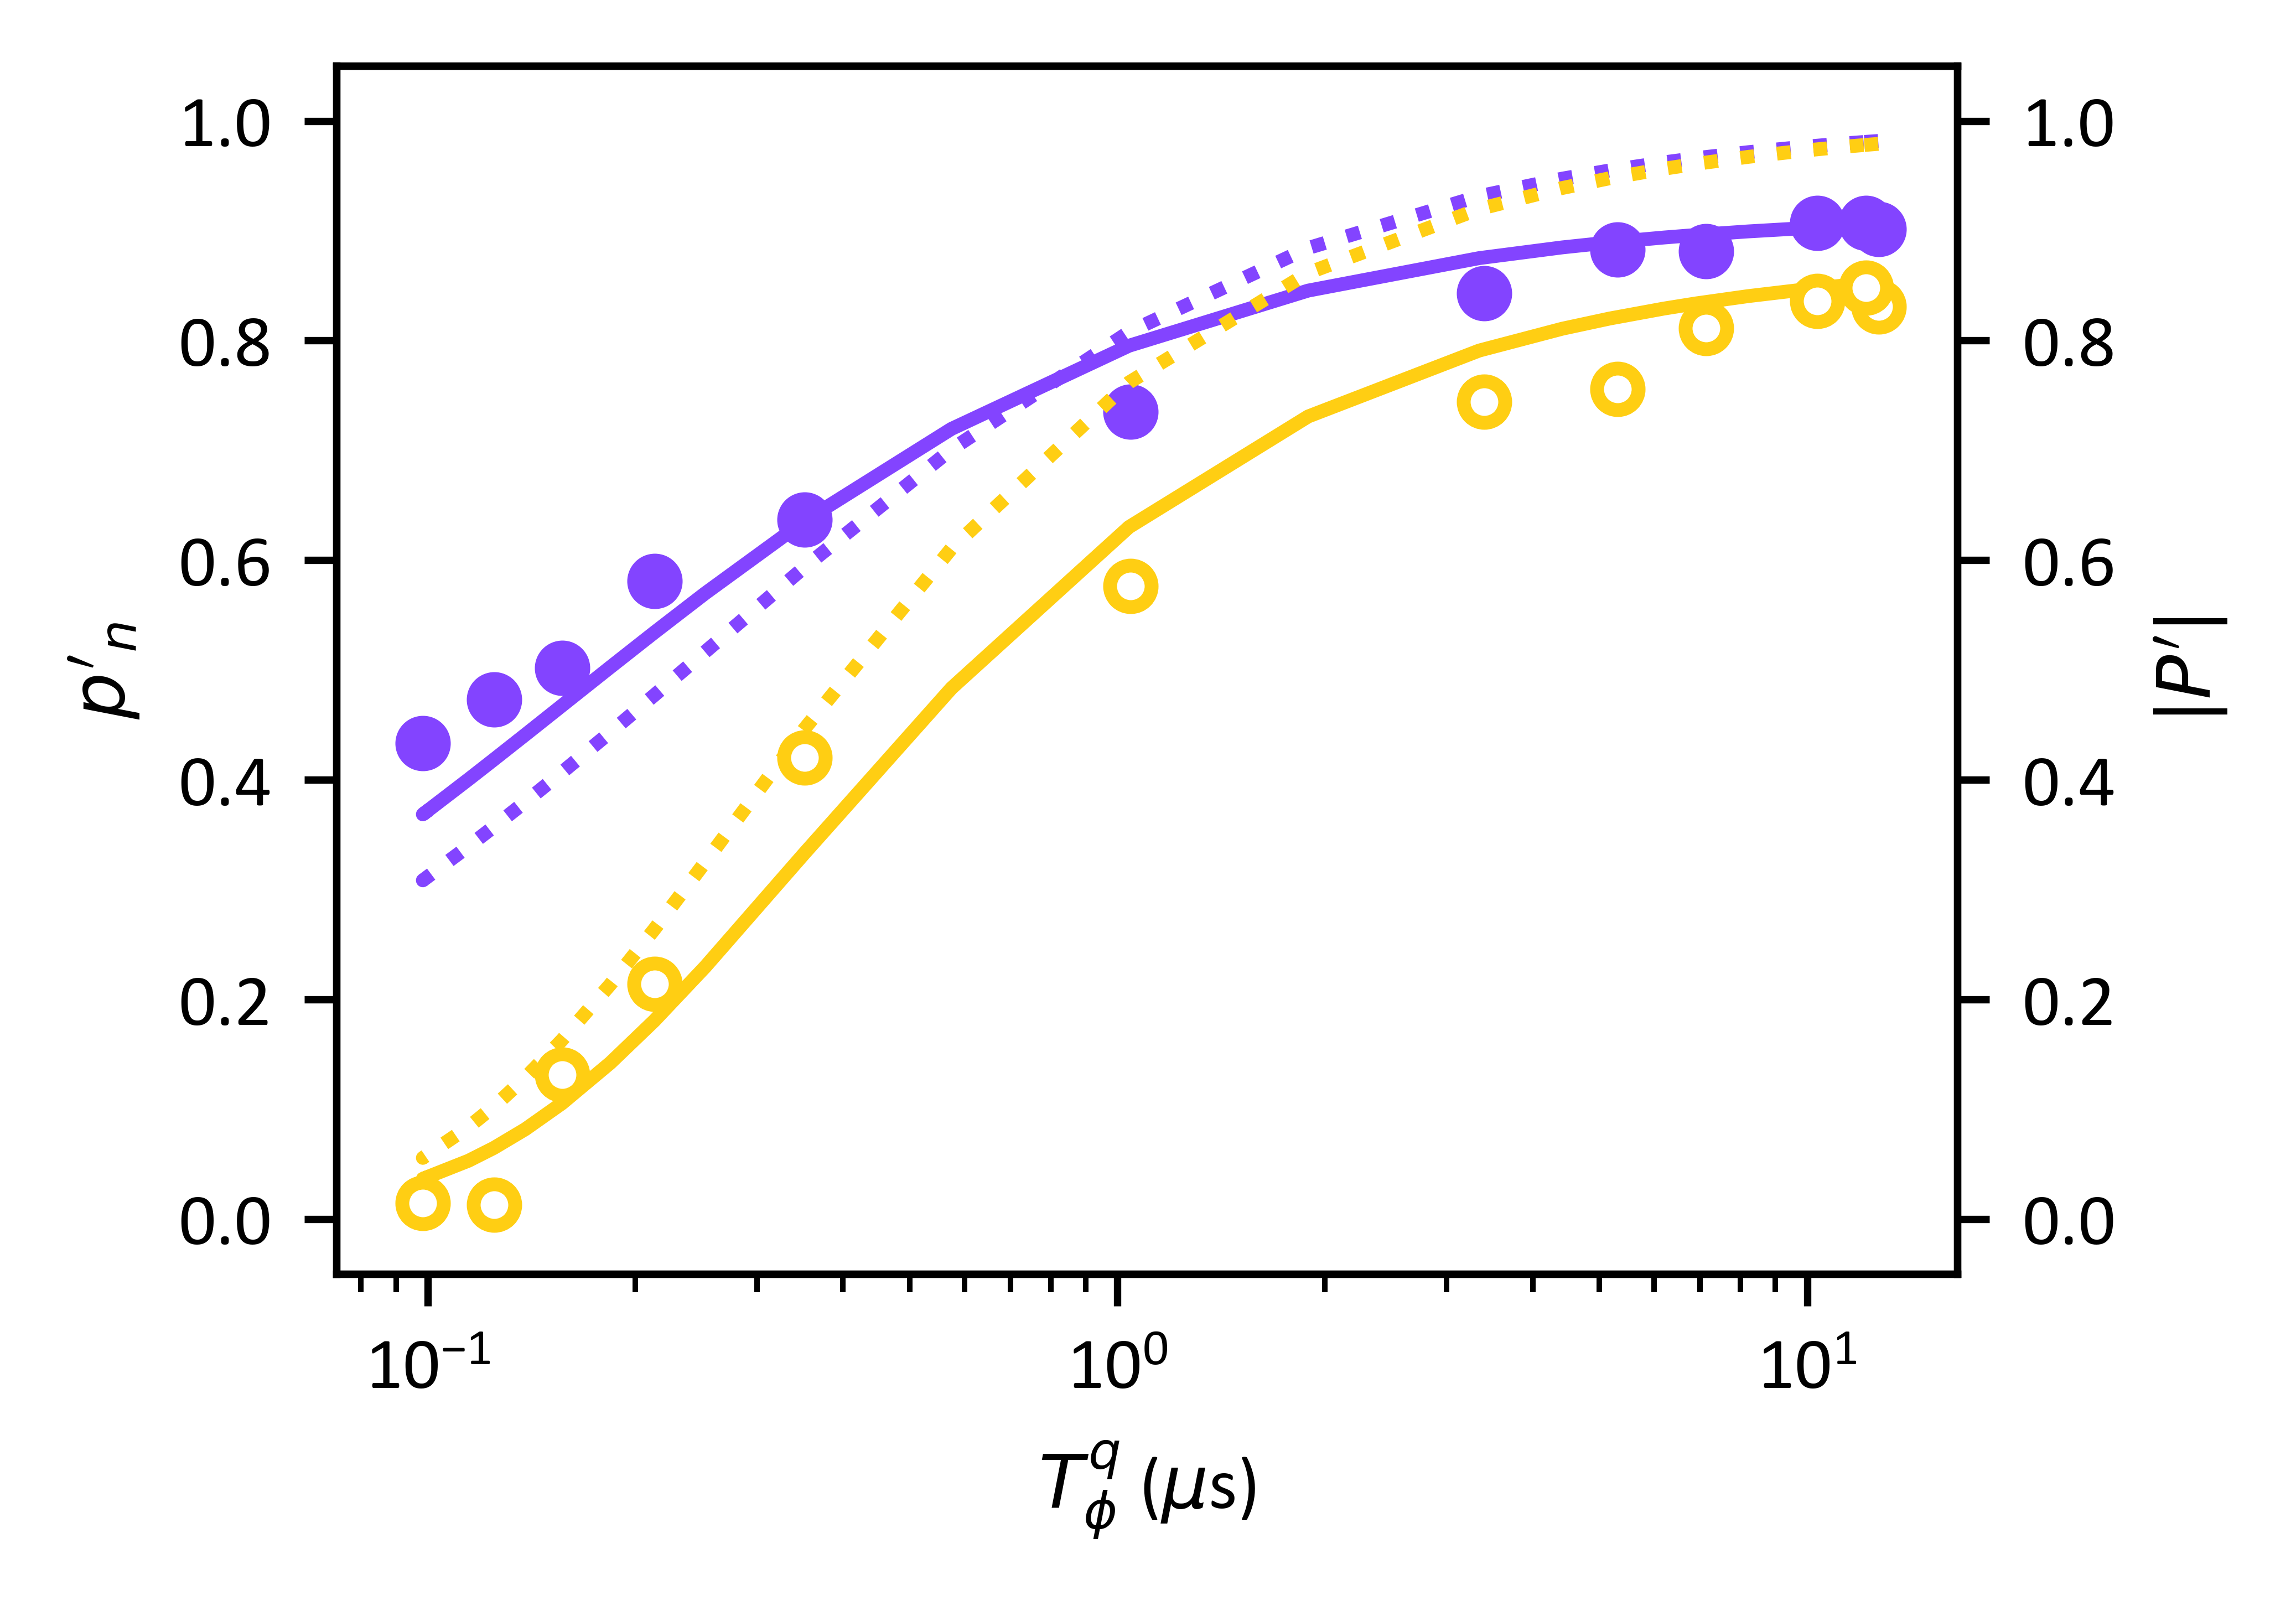

In [22]:
data_pns = np.load(
    r"F_v_Dim_and_T2_Data_Dec_16\results_decoherence_obs\pns.npz"
)


data_W = np.load(
    r"F_v_Dim_and_T2_Data_Dec_16\results_decoherence_obs\w.npz"
)



T2_exp = data_W["T2_exp"]


parity_exp = data_W["parity_exp"]


T2_err = data_W["T2_err"]


err_parity = data_W["err_parity"]


w_formula = data_W["w_formula"]


parity_sim = data_W["parity_sim"]


pns_exp = data_pns["pns_exp"]


err_pns = data_pns["err_pns"]


pe_formula = data_pns["pe_formula"]


pns_sim = data_pns["pns_sim"]



fig, ax1 = plt.subplots(figsize=(8 * cm, 6 * cm), dpi=1200)


ax1.plot(T2_exp * 1e-3, pe_formula, color=color_Q, linestyle=":", label="pns ideal")


ax1.plot(T2_exp * 1e-3, pns_sim, color=color_Q, label="pns sim")



Tphi_exp = 1 / (1 / T2_exp - 0.5 / exp_params.T1)

ax1.errorbar(





    Tphi_exp[1::2] * 1e-3,





    pns_exp[1::2],





    xerr=T2_err[1::2],





    yerr=err_pns[1::2],





    ms=Q_markersize,





    color=color_Q,





    fmt="o",





    ecolor=color_Q,
    label="pns exp",
)





# ax1.set_ylabel("Pe", fontsize=label_fontsize, color=color_Q)


ax1.tick_params(axis="y", labelcolor="black")


ax1.set_xscale("log")



ax1.set_ylim(-0.05, 1.05)


# ax1.legend(loc=7, prop={"size": label_fontsize})


plt.xticks()


plt.yticks()



ax2 = ax1.twinx()
ax2.plot(

    T2_exp * 1e-3, w_formula, color=color_W_corr, linestyle=":", label="parity ideal "
)



ax2.plot(T2_exp * 1e-3, parity_sim, color=color_W_corr, label="parity sim ")
ax2.errorbar(

    Tphi_exp[1::2] * 1e-3,

    parity_exp[1::2],

    xerr=T2_err[1::2],



    yerr=err_parity[1::2],


    fmt="o",


    markersize=W_markersize,

    markeredgecolor=color_W_corr,

    markeredgewidth=W_markeredgewidth,

    c="white",





    linewidth=Q_linewidth,





    elinewidth=Q_linewidth,





    ecolor=color_W_corr,





    zorder=12,
    label="parity exp",
)



ax1.set_xlabel(r"$T_\phi^q$ ($\mu$s)")
ax1.set_ylabel(r"$p'_n$")
ax2.set_ylabel(r"$|P'|$")


# ax2.set_ylabel("Parity", fontsize=label_fontsize, color=color_W_corr, rotation=270)


ax2.tick_params(axis="y", labelcolor="black")


ax2.set_xscale("log")



ax2.set_ylim(-0.05, 1.05)


# ax2.legend(loc=4)



plt.xticks()



plt.yticks()





fig.savefig(save_figs_path + "/fig3_t2obs_small.pdf", dpi=1200)

# Figure 4: Fidelities for decoherence and dimension

### Fidelity v T2

In [14]:
def extract_W_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays

    results_corr = np.zeros((numDims, 2))
    results_norm = np.zeros((numDims, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        # print(sim_fidelity)
        results_corr[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm


def extract_Q_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((numDims, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze().astype(float)
        # print(sim_fidelity)
        results[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results


def extract_Q_data_MLE(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((numDims, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_MLE"].squeeze().astype(float)
        # print(sim_fidelity)
        results[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results

In [15]:
W_corr_exp_results, W_norm_exp_results = extract_W_data(W_exp_directory, numDims=5)

Q_exp_results = extract_Q_data(Q_exp_directory, numDims=5)

In [16]:
Q_exp_results_MLE = extract_Q_data_MLE(Q_exp_directory, numDims=5)

In [17]:
Q_exp_results_MLE[:, 0]

array([0.98673614, 0.97928551, 0.95836995, 0.93332212, 0.91819736])

In [18]:
Q_exp_results[:, 0] - Q_exp_results_MLE[:, 0]

array([0.00540396, 0.00900822, 0.01502899, 0.01690249, 0.02064705])

In [19]:
W_sim_grape_directory = r"results_dimensions\sim\W\grape_target_states"
W_corr_sim_grape_results, W_norm_sim_grape_results = extract_W_data(
    W_sim_grape_directory, numDims=5
)

W_sim_ideal_directory = r"results_dimensions\sim\W\ideal_target_states"
W_corr_sim_ideal_results, W_norm_sim_ideal_results = extract_W_data(
    W_sim_ideal_directory, numDims=7
)


Q_sim_grape_directory = r"results_dimensions\sim\Q\grape_target_states"
Q_sim_grape_results = extract_Q_data(Q_sim_grape_directory, numDims=5)

Q_sim_ideal_directory = r"results_dimensions\sim\Q\ideal_target_states"
Q_sim_ideal_results = extract_Q_data(Q_sim_ideal_directory, numDims=7)

In [20]:
def extract_W_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results_corr = np.zeros((5, 2))
    results_norm = np.zeros((5, 2))
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)

        results_corr[int(file_name[13]), :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[13]), :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm  # , final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze()
        # print(fidelity)
        # final_rho_BME = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        results[int(file_name[13]), :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results  # , final_rho_BME


def extract_Q_T2_fidelities_MLE(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_MLE"].squeeze()
        # print(fidelity)
        # final_rho_BME = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        results[int(file_name[13]), :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results  # , final_rho_BME

In [21]:
Q_exp_T2_fidelities = extract_Q_T2_fidelities(Q_exp_T2_directory)
Q_exp_T2_fidelities_MLE = extract_Q_T2_fidelities_MLE(Q_exp_T2_directory)



W_corr_exp_T2_fidelities, W_norm_exp_T2_fidelities = extract_W_T2_fidelities(
    W_exp_T2_directory
)

In [22]:
Q_exp_T2_fidelities[:, 0] - Q_exp_T2_fidelities_MLE[:, 0]

array([0.0168657 , 0.01904592, 0.01356847, 0.01106533, 0.01545124])

In [23]:
Q_exp_T2_fidelities_MLE[:, 0]

array([0.93248832, 0.91825408, 0.89544055, 0.86598253, 0.86068629])

In [24]:
Q_sim_T2_grape_directory = r"results_t2\sim\Q\grape_target_states"
Q_sim_T2_grape_results = extract_Q_T2_fidelities(Q_sim_T2_grape_directory)

# Q_sim_T2_ideal_directory = r"results_t2\sim\Q\ideal_target_states"
# Q_sim_T2_ideal_results = extract_Q_T2_data(Q_sim_T2_ideal_directory)

W_sim_T2_grape_directory = r"results_t2\sim\W\grape_target_states"
W_corr_sim_T2_grape_results, W_norm_sim_T2_grape_results = extract_W_T2_fidelities(
    W_sim_T2_grape_directory
)

# W_sim_T2_ideal_directory = r"results_t2\sim\W\ideal_target_states"
# W_corr_sim_T2_ideal_results, W_norm_sim_T2_ideal_results = extract_W_T2_data(
#     W_sim_T2_ideal_directory
# )

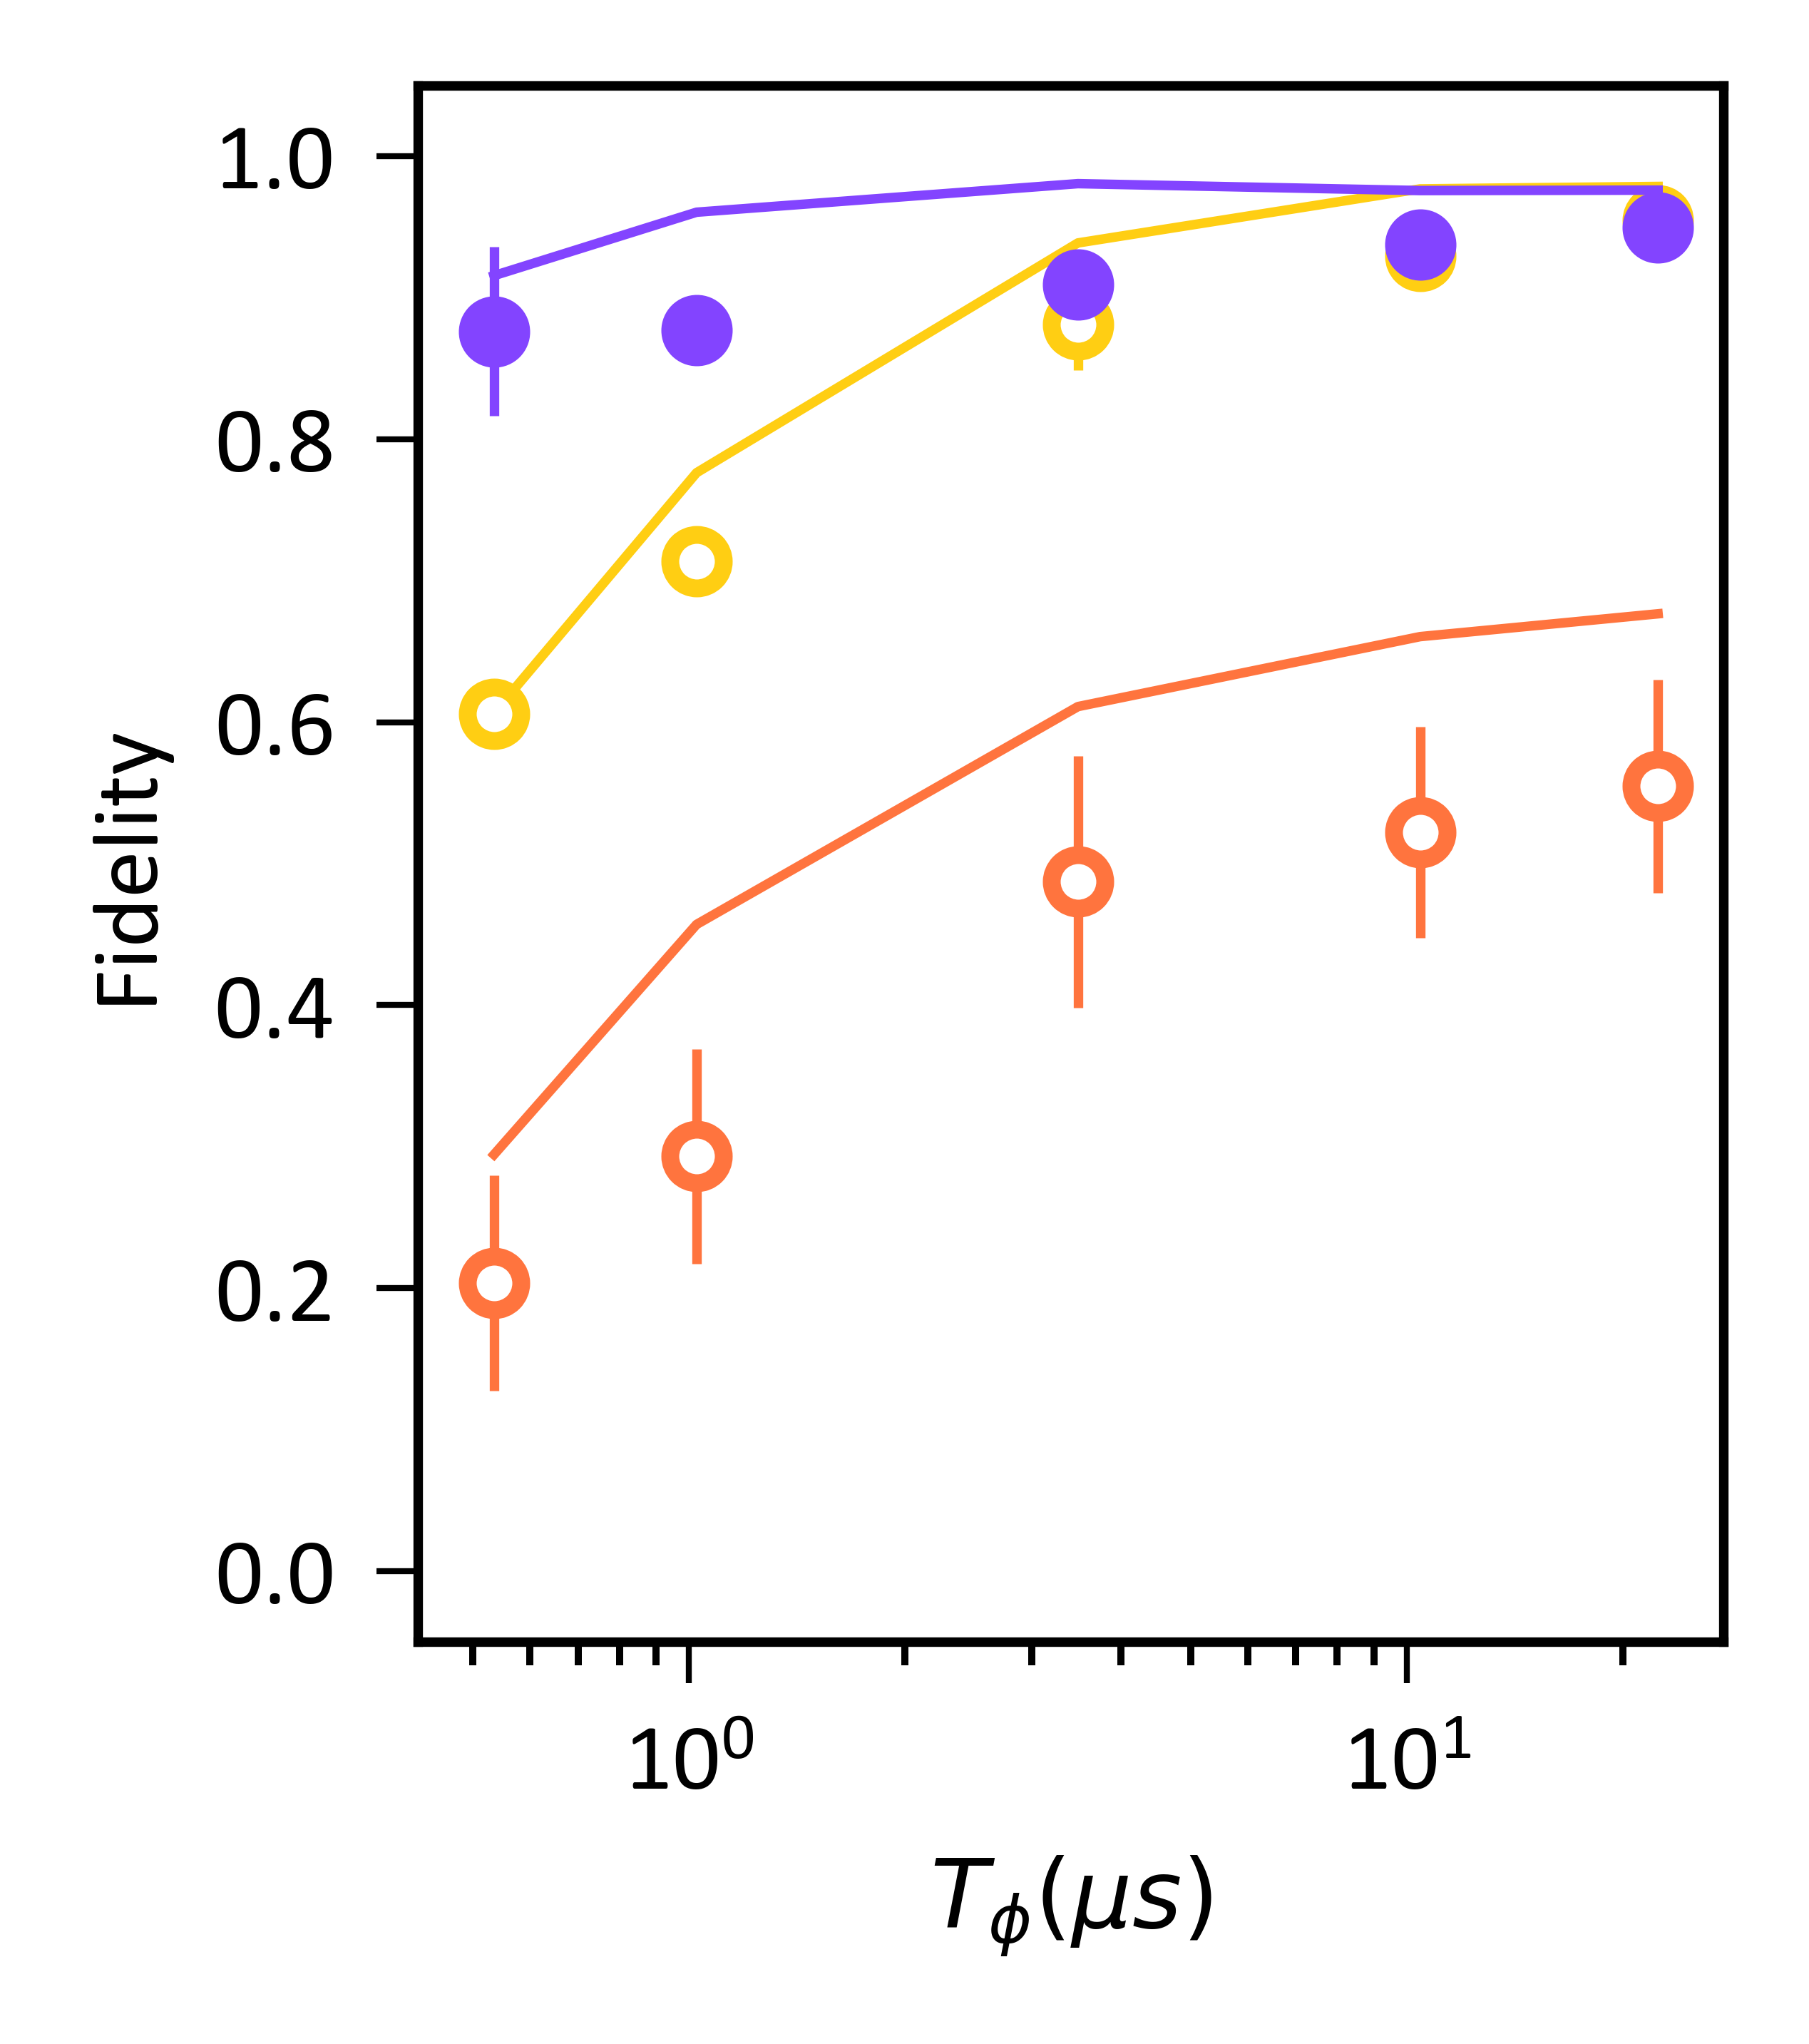

In [26]:
fig, ax = plt.subplots(figsize=(5 * cm, 6 * cm), dpi=1200)

ax.set_ylim([-0.05, 1.05])
T2s = exp_params.badt2_list / 1e3
T2s_err = exp_params.badt2_err / 1e3

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

Tphis = 1 / (1 / T2s - 0.5 / exp_params.T1)

line_Qexp = ax.errorbar(
    x=Tphis,
    y=Q_exp_T2_fidelities[:, 0],
    yerr=Q_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    c=color_Q,
    fmt="o",
    markersize=Q_markersize,
    elinewidth=sim_linewidth,
    ecolor=color_Q,
    zorder=15,
    label="Q exp",
)
line_Wcorrexp = ax.errorbar(
    x=Tphis,
    y=W_corr_exp_T2_fidelities[:, 0],
    yerr=W_corr_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    fmt="o",
    markersize=W_markersize,
    markeredgecolor=color_W_corr,
    markeredgewidth=W_markeredgewidth,
    c="white",
    linewidth=sim_linewidth,
    elinewidth=sim_linewidth,
    ecolor=color_W_corr,
    zorder=12,
    label="W corr exp",
)
line_Wnormexp = ax.errorbar(
    x=Tphis,
    y=W_norm_exp_T2_fidelities[:, 0],
    yerr=W_norm_exp_T2_fidelities[:, 1],
    xerr=T2s_err,
    fmt="o",
    markersize=W_markersize,
    markeredgecolor=color_W_norm,
    markeredgewidth=W_markeredgewidth,
    c="white",
    linewidth=sim_linewidth,
    elinewidth=sim_linewidth,
    ecolor=color_W_norm,
    zorder=9,
    label="W norm exp",
    # markerfacecolor
)

line_Qsim = plt.plot(
    Tphis,
    Q_sim_T2_grape_results[:, 0],
    "-",
    linewidth=sim_linewidth,
    color=color_Q,
    label="Q grape sim",
    zorder=15,
)
line_Wcorrsim = plt.plot(
    Tphis,
    W_corr_sim_T2_grape_results[:, 0],
    "-",
    linewidth=sim_linewidth,
    color=color_W_corr,
    label="W corr grape sim",
    zorder=11,
)
line_Wnormsim = plt.plot(
    Tphis,
    W_norm_sim_T2_grape_results[:, 0],
    "-",
    linewidth=sim_linewidth,
    color=color_W_norm,
    label="W norm grape sim",
    zorder=3,
)


ax.set_xscale("log")
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel("$T_{\phi} (\mu s)$")
ax.set_ylabel("Fidelity")

# ax.legend()
# ax.set_title("Fidelity vs T2")
plt.tick_params(width=0.5)
plt.show()


fig.savefig(save_figs_path + "/fig4_t2.pdf", dpi=1200)

### Fidelity v Dimension

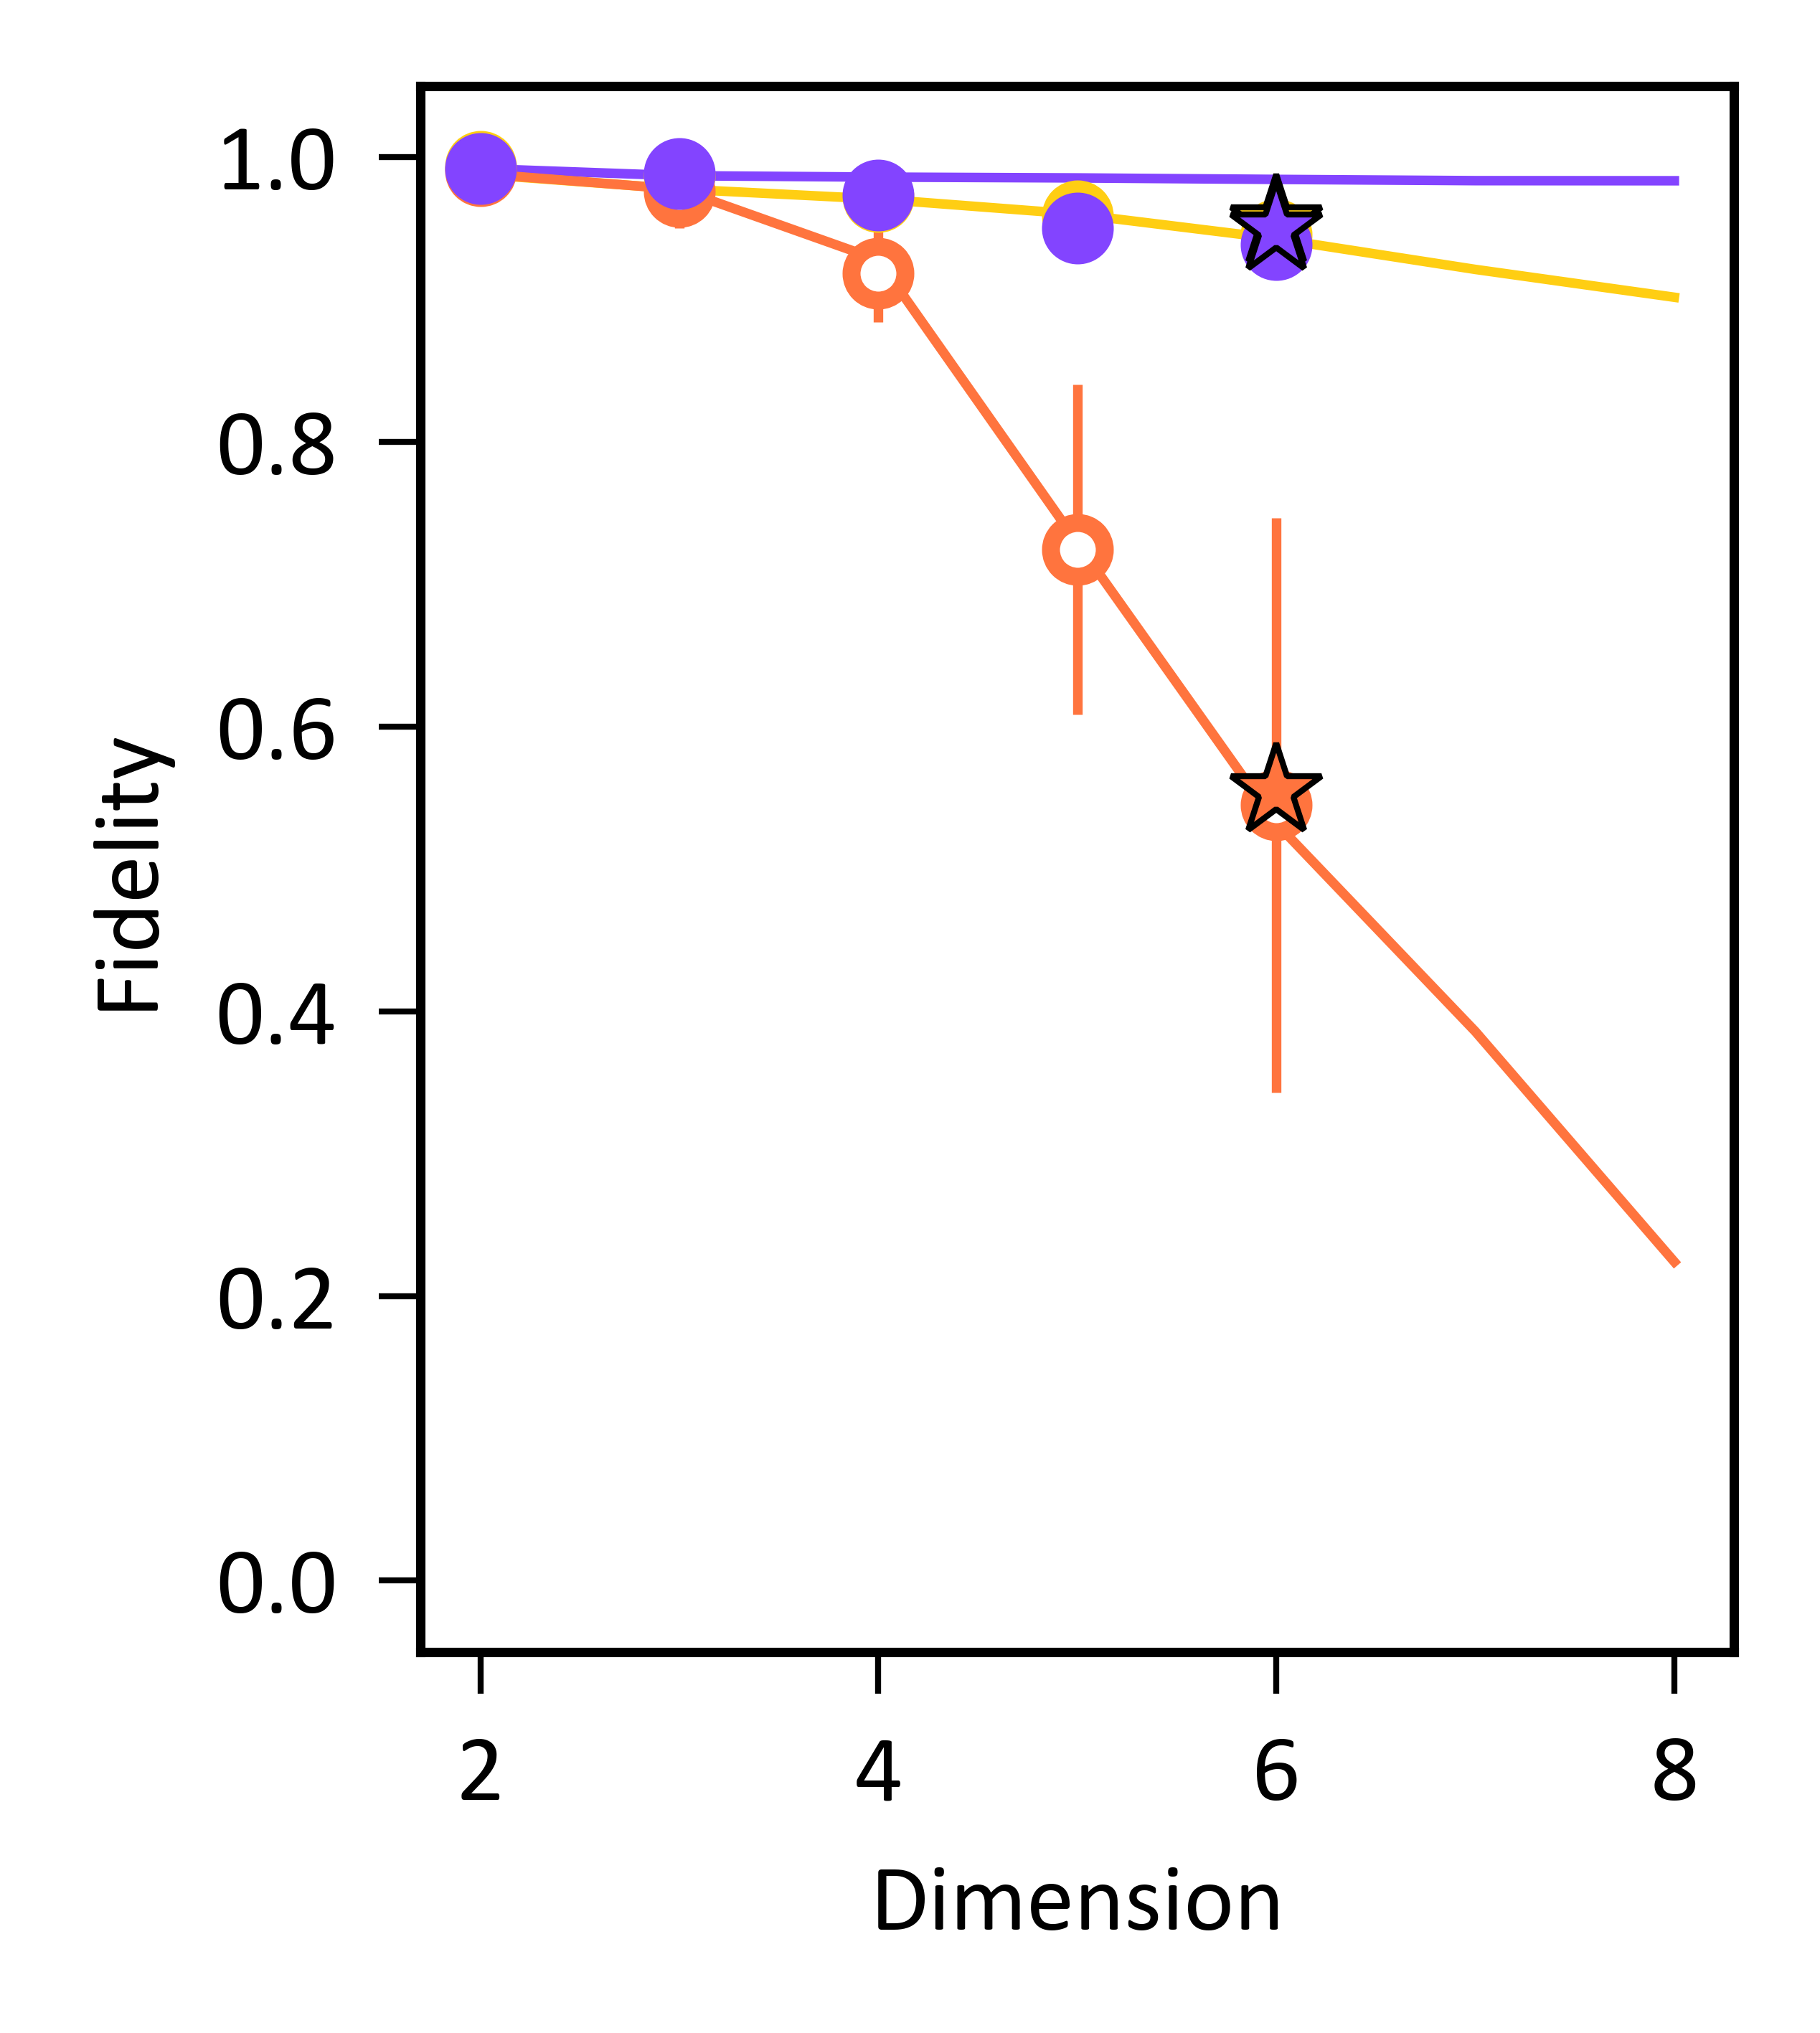

In [27]:
fig = plt.figure(figsize=(5 * cm, 6 * cm), dpi=1200)
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=2 * cm)


# ax.tick_params(axis="x", which="major", length=10 * cm, width=3 * cm)
# ax.tick_params(axis="y", which="major", length=12 * cm, width=3 * cm)
# ax.tick_params(axis="both", which="minor", length=6 * cm, width=2 * cm)

sim_dimensions = [2, 3, 4, 5, 6, 7, 8]
exp_dimensions = [2, 3, 4, 5, 6]
Q_ms_list = [Q_markersize, Q_markersize, Q_markersize, Q_markersize, Q_markersize, 0, 0]
W_ms_list = [W_markersize, W_markersize, W_markersize, W_markersize, W_markersize, 0, 0]

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

# plotting the dots
for i in range(len(exp_dimensions)):
    ax.errorbar(
        x=i + 2,
        y=Q_exp_results[i, 0],
        yerr=Q_exp_results[i, 1],
        c=color_Q,
        fmt="o",
        markersize=Q_markersize,
        elinewidth=sim_linewidth,
        ecolor=color_Q,
        label=my_labels["Q exp"],
        zorder=15,
    )

    my_labels["Q exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_corr_exp_results[i, 0],
        yerr=W_corr_exp_results[i, 1],
        fmt="o",
        markersize=W_ms_list[i],
        markeredgecolor=color_W_corr,
        markeredgewidth=W_markeredgewidth,
        c="white",
        linewidth=sim_linewidth,
        elinewidth=sim_linewidth,
        ecolor=color_W_corr,
        zorder=12,
        label="W corr exp",
    )

    my_labels["W corr exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_norm_exp_results[i, 0],
        yerr=W_norm_exp_results[i, 1],
        fmt="o",
        markersize=W_ms_list[i],
        markeredgecolor=color_W_norm,
        markeredgewidth=W_markeredgewidth,
        c="white",
        linewidth=sim_linewidth,
        elinewidth=sim_linewidth,
        ecolor=color_W_norm,
        zorder=12,
        label="W norm exp",
    )
    my_labels["W norm exp"] = "_nolegend_"


# plotting the smooth lines: sim rho
# plt.plot(
#     exp_dimensions,
#     Q_sim_grape_results[:, 0],
#     "-",
#     color=color_Q,
#     label="Q grape sim",
# )

# plt.plot(
#     exp_dimensions,
#     W_corr_sim_grape_results[:, 0],
#     "-",
#     color=color_W_corr,
#     label="W corr grape sim",
# )

# plt.plot(
#     exp_dimensions,
#     W_norm_sim_grape_results[:, 0],
#     "-",
#     color=color_W_norm,
#     label="W norm grape sim",
# )


# plotting the dotted lines: ideal rho
plt.plot(
    sim_dimensions,
    Q_sim_ideal_results[:, 0],
    "-",
    color=color_Q,
    linewidth=sim_linewidth,
    label="Q ideal sim",
)
plt.plot(
    sim_dimensions,
    W_corr_sim_ideal_results[:, 0],
    "-",
    color=color_W_corr,
    linewidth=sim_linewidth,
    label="W corr ideal sim",
)
plt.plot(
    sim_dimensions,
    W_norm_sim_ideal_results[:, 0],
    "-",
    color=color_W_norm,
    linewidth=sim_linewidth,
    label="W norm ideal sim",
)


# plot the stars
plt.plot(
    6,
    Q_exp_T2_fidelities[0, 0],
    "*",
    color=color_Q,
    label="Q cat",
    mec=color_star_outline,
    mew=0.5,
    markersize=8,
    zorder=20,
)
plt.plot(
    6,
    W_corr_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_corr,
    label="W corr cat",
    mec=color_star_outline,
    mew=0.5,
    markersize=8,
    zorder=19,
)
plt.plot(
    6,
    W_norm_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_norm,
    mec=color_star_outline,
    mew=0.5,
    label="W norm cat",
    markersize=8,
    zorder=18,
)

# ax.fill_between(range(6, 9), 0, 1, alpha=0.3, color="#909599")
# ax.legend()
# ax.set_title("Fidelity vs " + r"$\rho$" + " Dimension")
plt.xticks(np.arange(2.0, 8.0 + 1, 2.0))
plt.tick_params(width=0.5)

ax.set_ylim([-0.05, 1.05])
plt.xlabel("Dimension")
plt.ylabel("Fidelity")
plt.show()


fig.savefig(save_figs_path + "/fig4_highdims.pdf", dpi=1200)

# Get Wigner plots

In [28]:
from matplotlib.ticker import (
    MultipleLocator,
    FormatStrFormatter,
    FixedLocator,
    MaxNLocator,
    LogLocator,
    FixedFormatter,
)


def imshow(
    Amp,
    figname=None,
    vmiddle=0.1,
    Figsize=(8.6 * cm, 6 * cm),
    extent=[0, 1, 0, 1],
    xround="%0.0f",
    yround="%0.1f",
    xlabel=r"$\delta\Phi/\Phi_0\times10^3$",
    ylabel=r"Frequency (GHz)",
    cbarlabel=r"",
    color="bwr",
    interpolations="gaussian",
    vmax=None,
    vmin=None,
    # settick=False,
    setcolor=False,
    title=None,
):
    if figname != None:
        fig = plt.figure(figname, figsize=Figsize, dpi=1200)
    else:
        fig = plt.figure(figsize=Figsize, dpi=1200)

    # ax1 = fig.add_axes([0.4, 0.15, 0.8, 0.8])

    if vmax == None:
        c = plt.imshow(
            Amp,
            aspect=1,
            interpolation=interpolations,
            origin="upper",
            extent=extent,
            vmax=np.max(Amp),
            vmin=np.min(Amp),
        )
    else:
        c = plt.imshow(
            Amp,
            aspect=1,
            interpolation=interpolations,
            origin="upper",
            extent=extent,
            vmax=vmax,
            vmin=vmin,
        )

    c.set_cmap(color)
    # #    c.set_cmap('jet')

    cbar = fig.colorbar(c)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(cbarlabel, rotation=270)

    # if settick == True:
    #     for tick in ax1.xaxis.get_major_ticks():
    #         tick.label.set_size(fontsize=20)
    #         ax1.xaxis.set_major_locator(FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
    #     for tick in ax1.yaxis.get_major_ticks():
    #         tick.label.set_size(fontsize=20)
    #     ax1.xaxis.set_major_formatter(FormatStrFormatter(xround))
    #     ax1.yaxis.set_major_formatter(FormatStrFormatter(yround))

    # else:

    #     for tick in ax1.xaxis.get_major_ticks():
    #         tick.label.set_size(fontsize=20)
    #     for tick in ax1.yaxis.get_major_ticks():
    #         tick.label.set_size(fontsize=20)
    #     ax1.xaxis.set_major_formatter(FormatStrFormatter(xround))
    #     ax1.yaxis.set_major_formatter(FormatStrFormatter(yround))

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    if title != None:
        ax1.set_title(title)

    plt.xticks(np.arange(-2.0, 2.5, 1.0), visible=True)
    plt.yticks(np.arange(-2.0, 2.5, 1.0), visible=True)

    plt.show()
    return fig


def plot_wigner(rho, cmap, figsize=(8.6 * cm, 6 * cm)):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    """

    xvec = np.linspace(-2, 2, 201)
    lim = 2 / np.pi

    W = wigner(rho, xvec, xvec, g=2)[::-1]

    fg = imshow(
        W,
        figname=None,
        vmiddle=0.1,
        Figsize=figsize,
        extent=[xvec[0], xvec[-1], xvec[0], xvec[-1]],
        xround="%0.1f",
        yround="%0.1f",
        xlabel=r"$Re\ (\alpha)$",
        ylabel=r"$Im\ (\alpha)$",
        color=cmap,
        interpolations=None,
        vmax=lim,
        vmin=-lim,
        # cmap=cmap,
        # settick=False,
        setcolor=False,
    )

    return fg

In [30]:
def extract_W_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    # results_corr = np.zeros((5, 2))
    # results_norm = np.zeros((5, 2))
    final_rho_BME_corr = np.empty((5, 4, 6, 6), dtype=np.complex_)
    final_rho_BME_norm = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        # fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        final_rho_BME_corr[int(file_name[13]), :] = data["final_rho_BME_corr"].squeeze()
        final_rho_BME_norm[int(file_name[13]), :] = data["final_rho_BME_norm"].squeeze()
        # print(sim_fidelity)
        # results_corr[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_corr), np.std(fidelity_corr)]
        # )
        # results_norm[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_norm), np.std(fidelity_norm)]
        # )

    return final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))
    final_rho_BME = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity = data["F_Bayes_BME"].squeeze()
        final_rho_BME[int(file_name[13]), :] = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        # results[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity), np.std(fidelity)]
        # )

    return final_rho_BME

In [31]:
Q_exp_T2_rhos = extract_Q_T2_rhos(Q_exp_T2_directory)
W_corr_exp_T2_rhos, W_norm_exp_T2_rhos = extract_W_T2_rhos(W_exp_T2_directory)

In [32]:
which_t2_to_plot = 0  # from 0 to 4, from highest (perfect) to lowest (worst) T2:
which_cat_to_plot = 3  # from 0 to 3

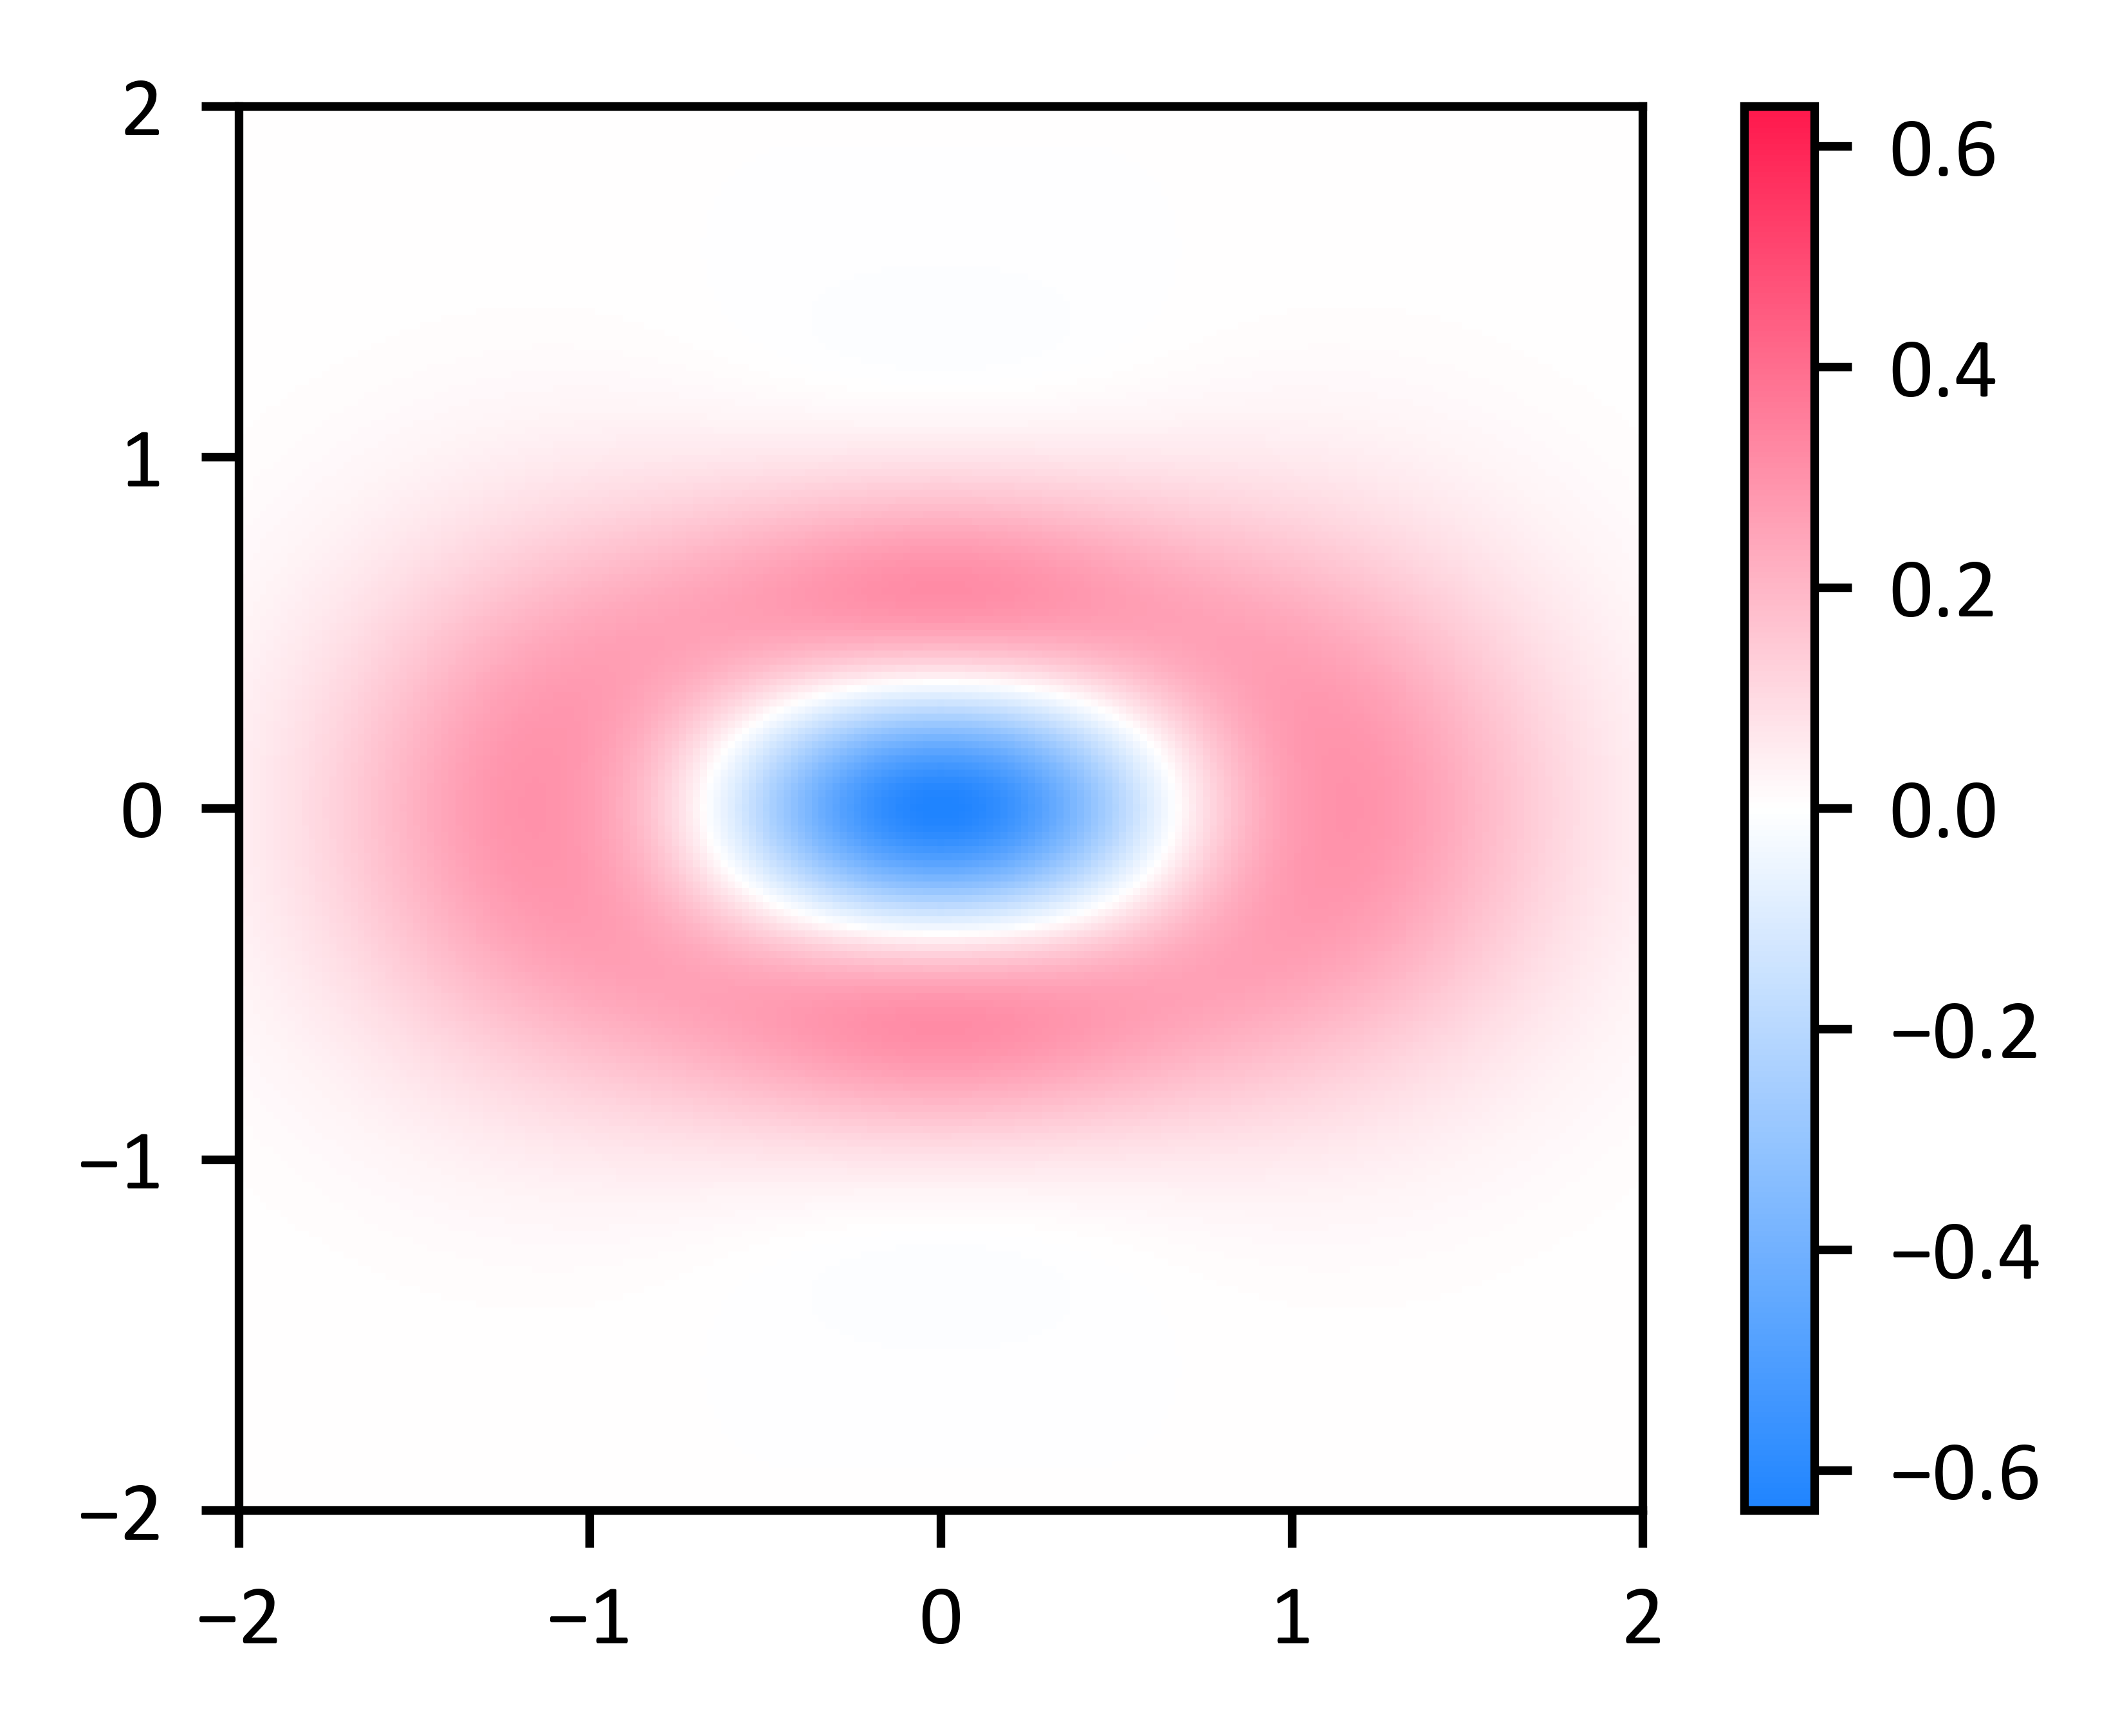

In [34]:
target = (coherent(10, 1) - coherent(10, -1 * 1)).unit()
dm = ket2dm(target)

# fgideal = plot_wigner(dm, cmap=wigner_custom_cmap)


fg1 = plot_wigner(dm, wigner_custom_cmap)
fg1.savefig(save_figs_path + "/ideal_wigner.pdf", dpi=1200)
# fgideal.savefig(save_figs_path + f"/ideal_wigner.pdf", dpi=1200)

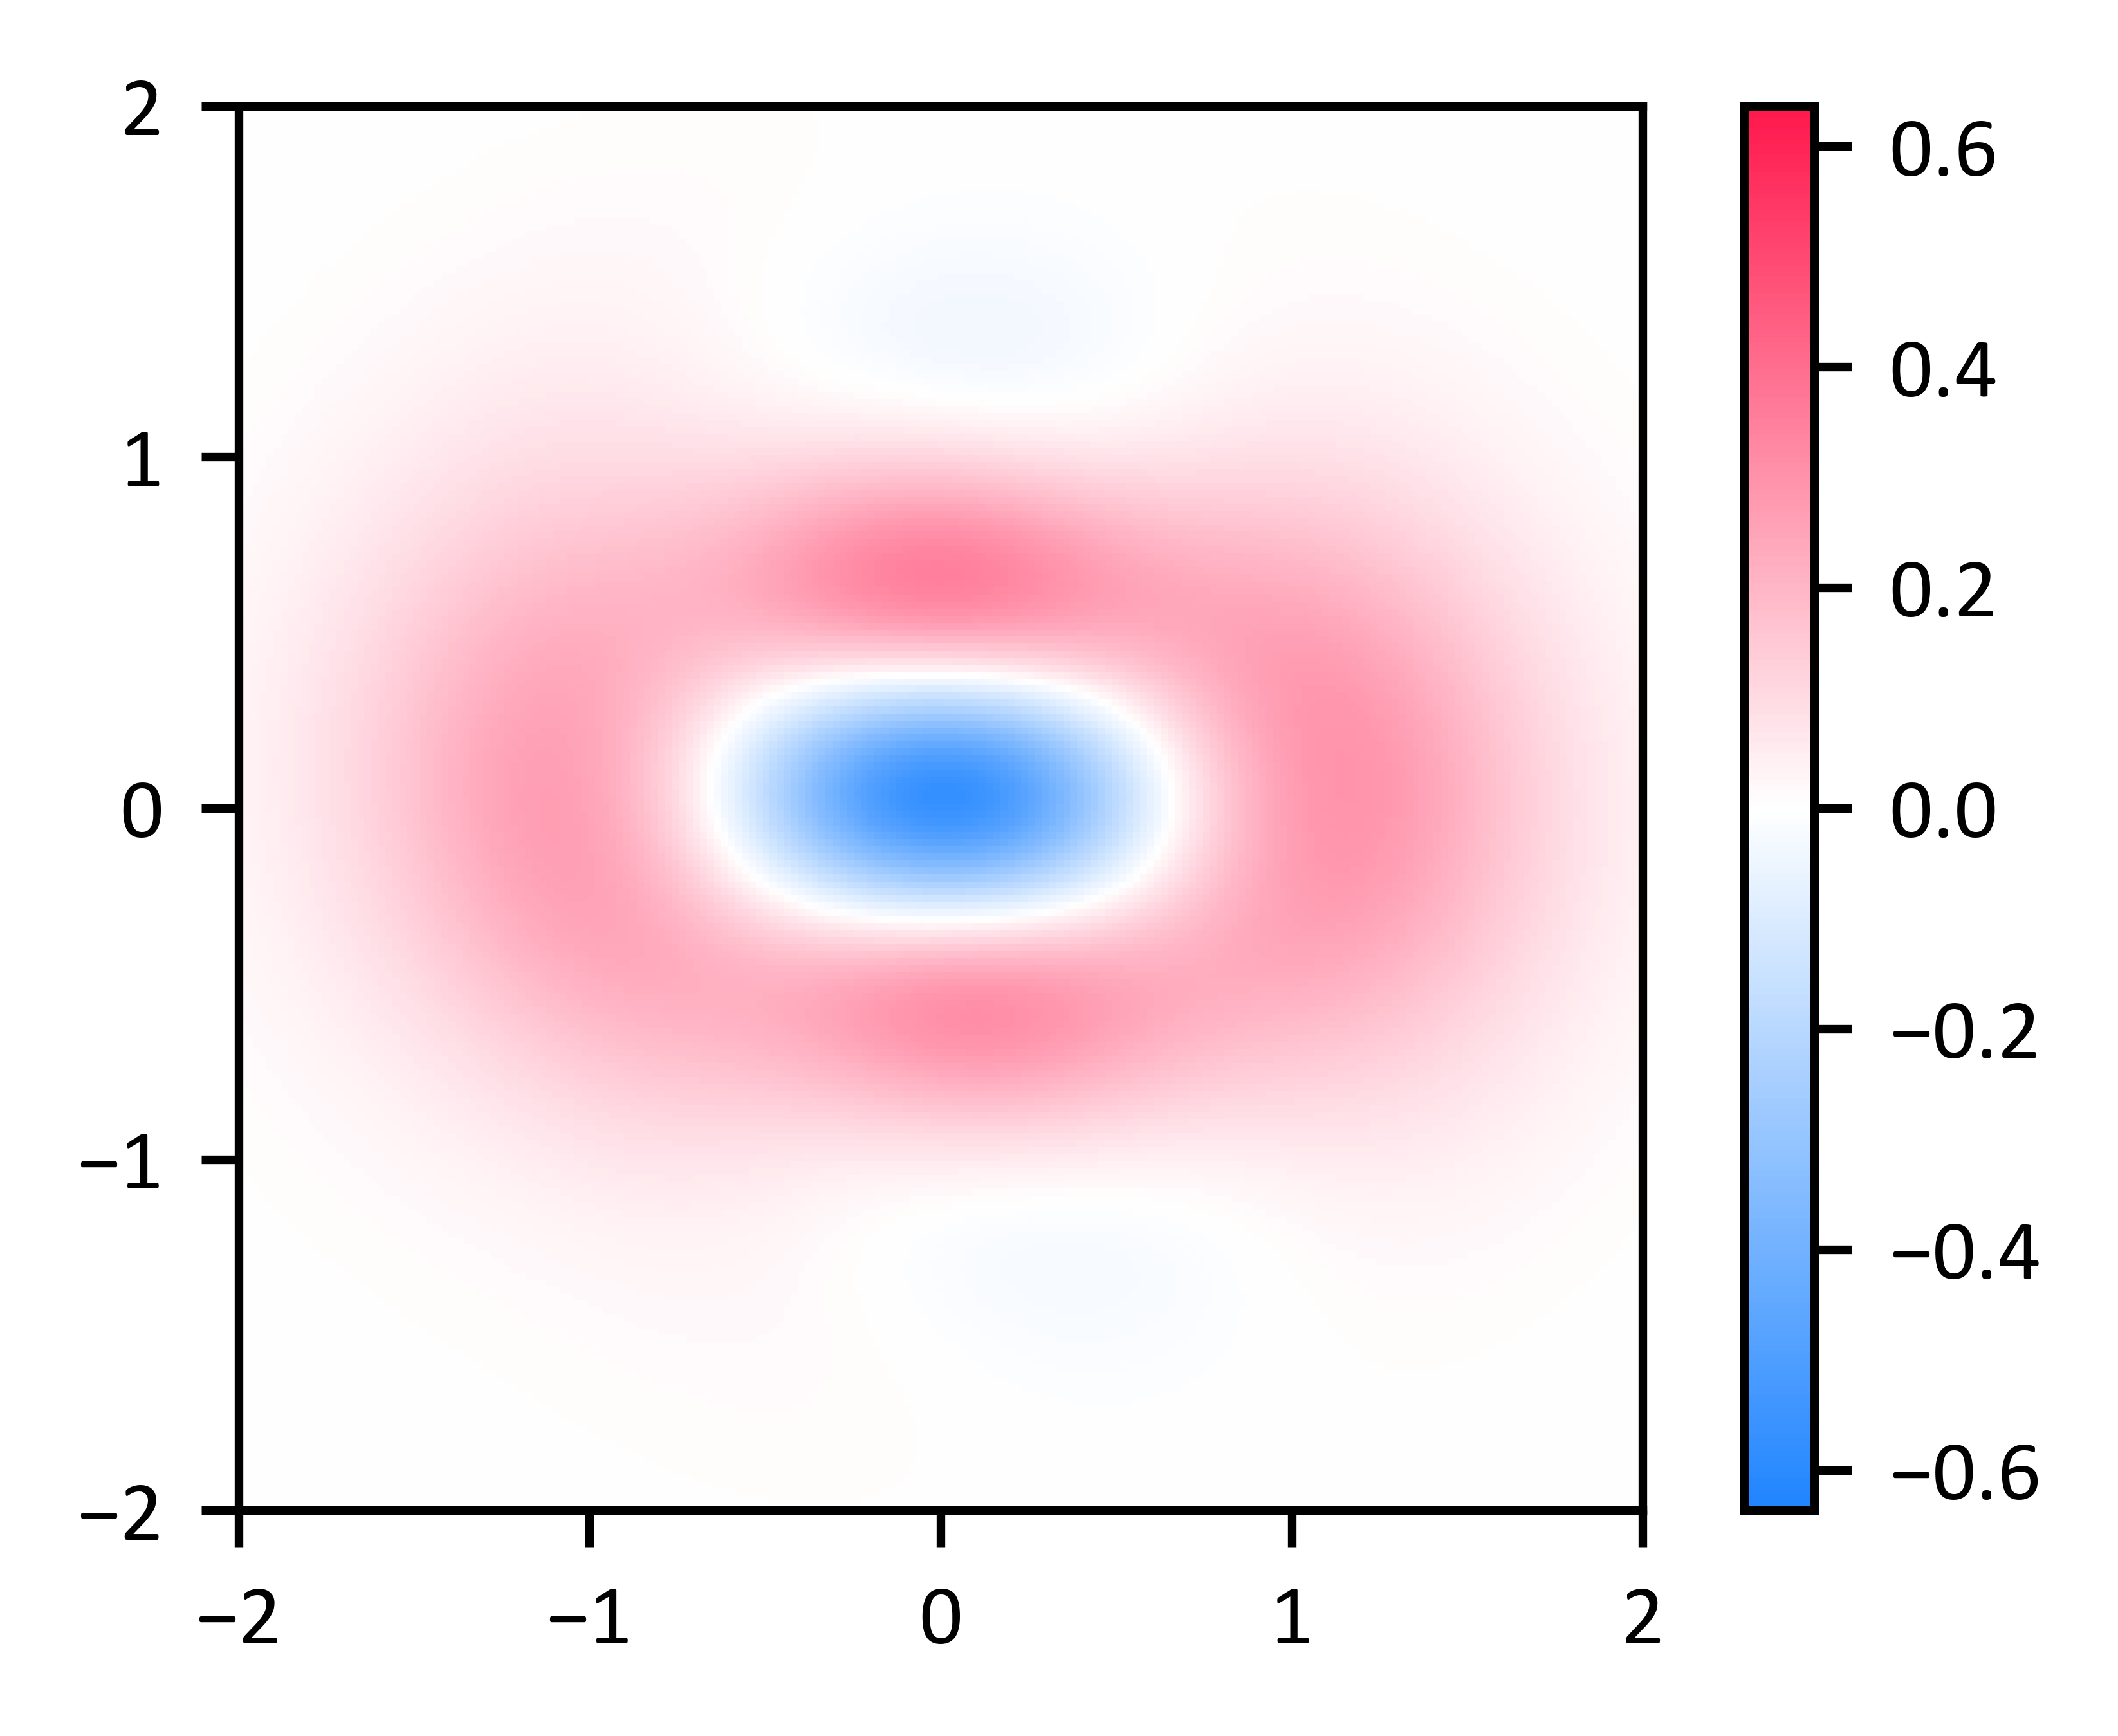

In [35]:
fg1 = plot_wigner(
    Qobj(Q_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]), wigner_custom_cmap
)

fg1.savefig(save_figs_path + f"/Q_T2={which_t2_to_plot}.pdf", dpi=1200)

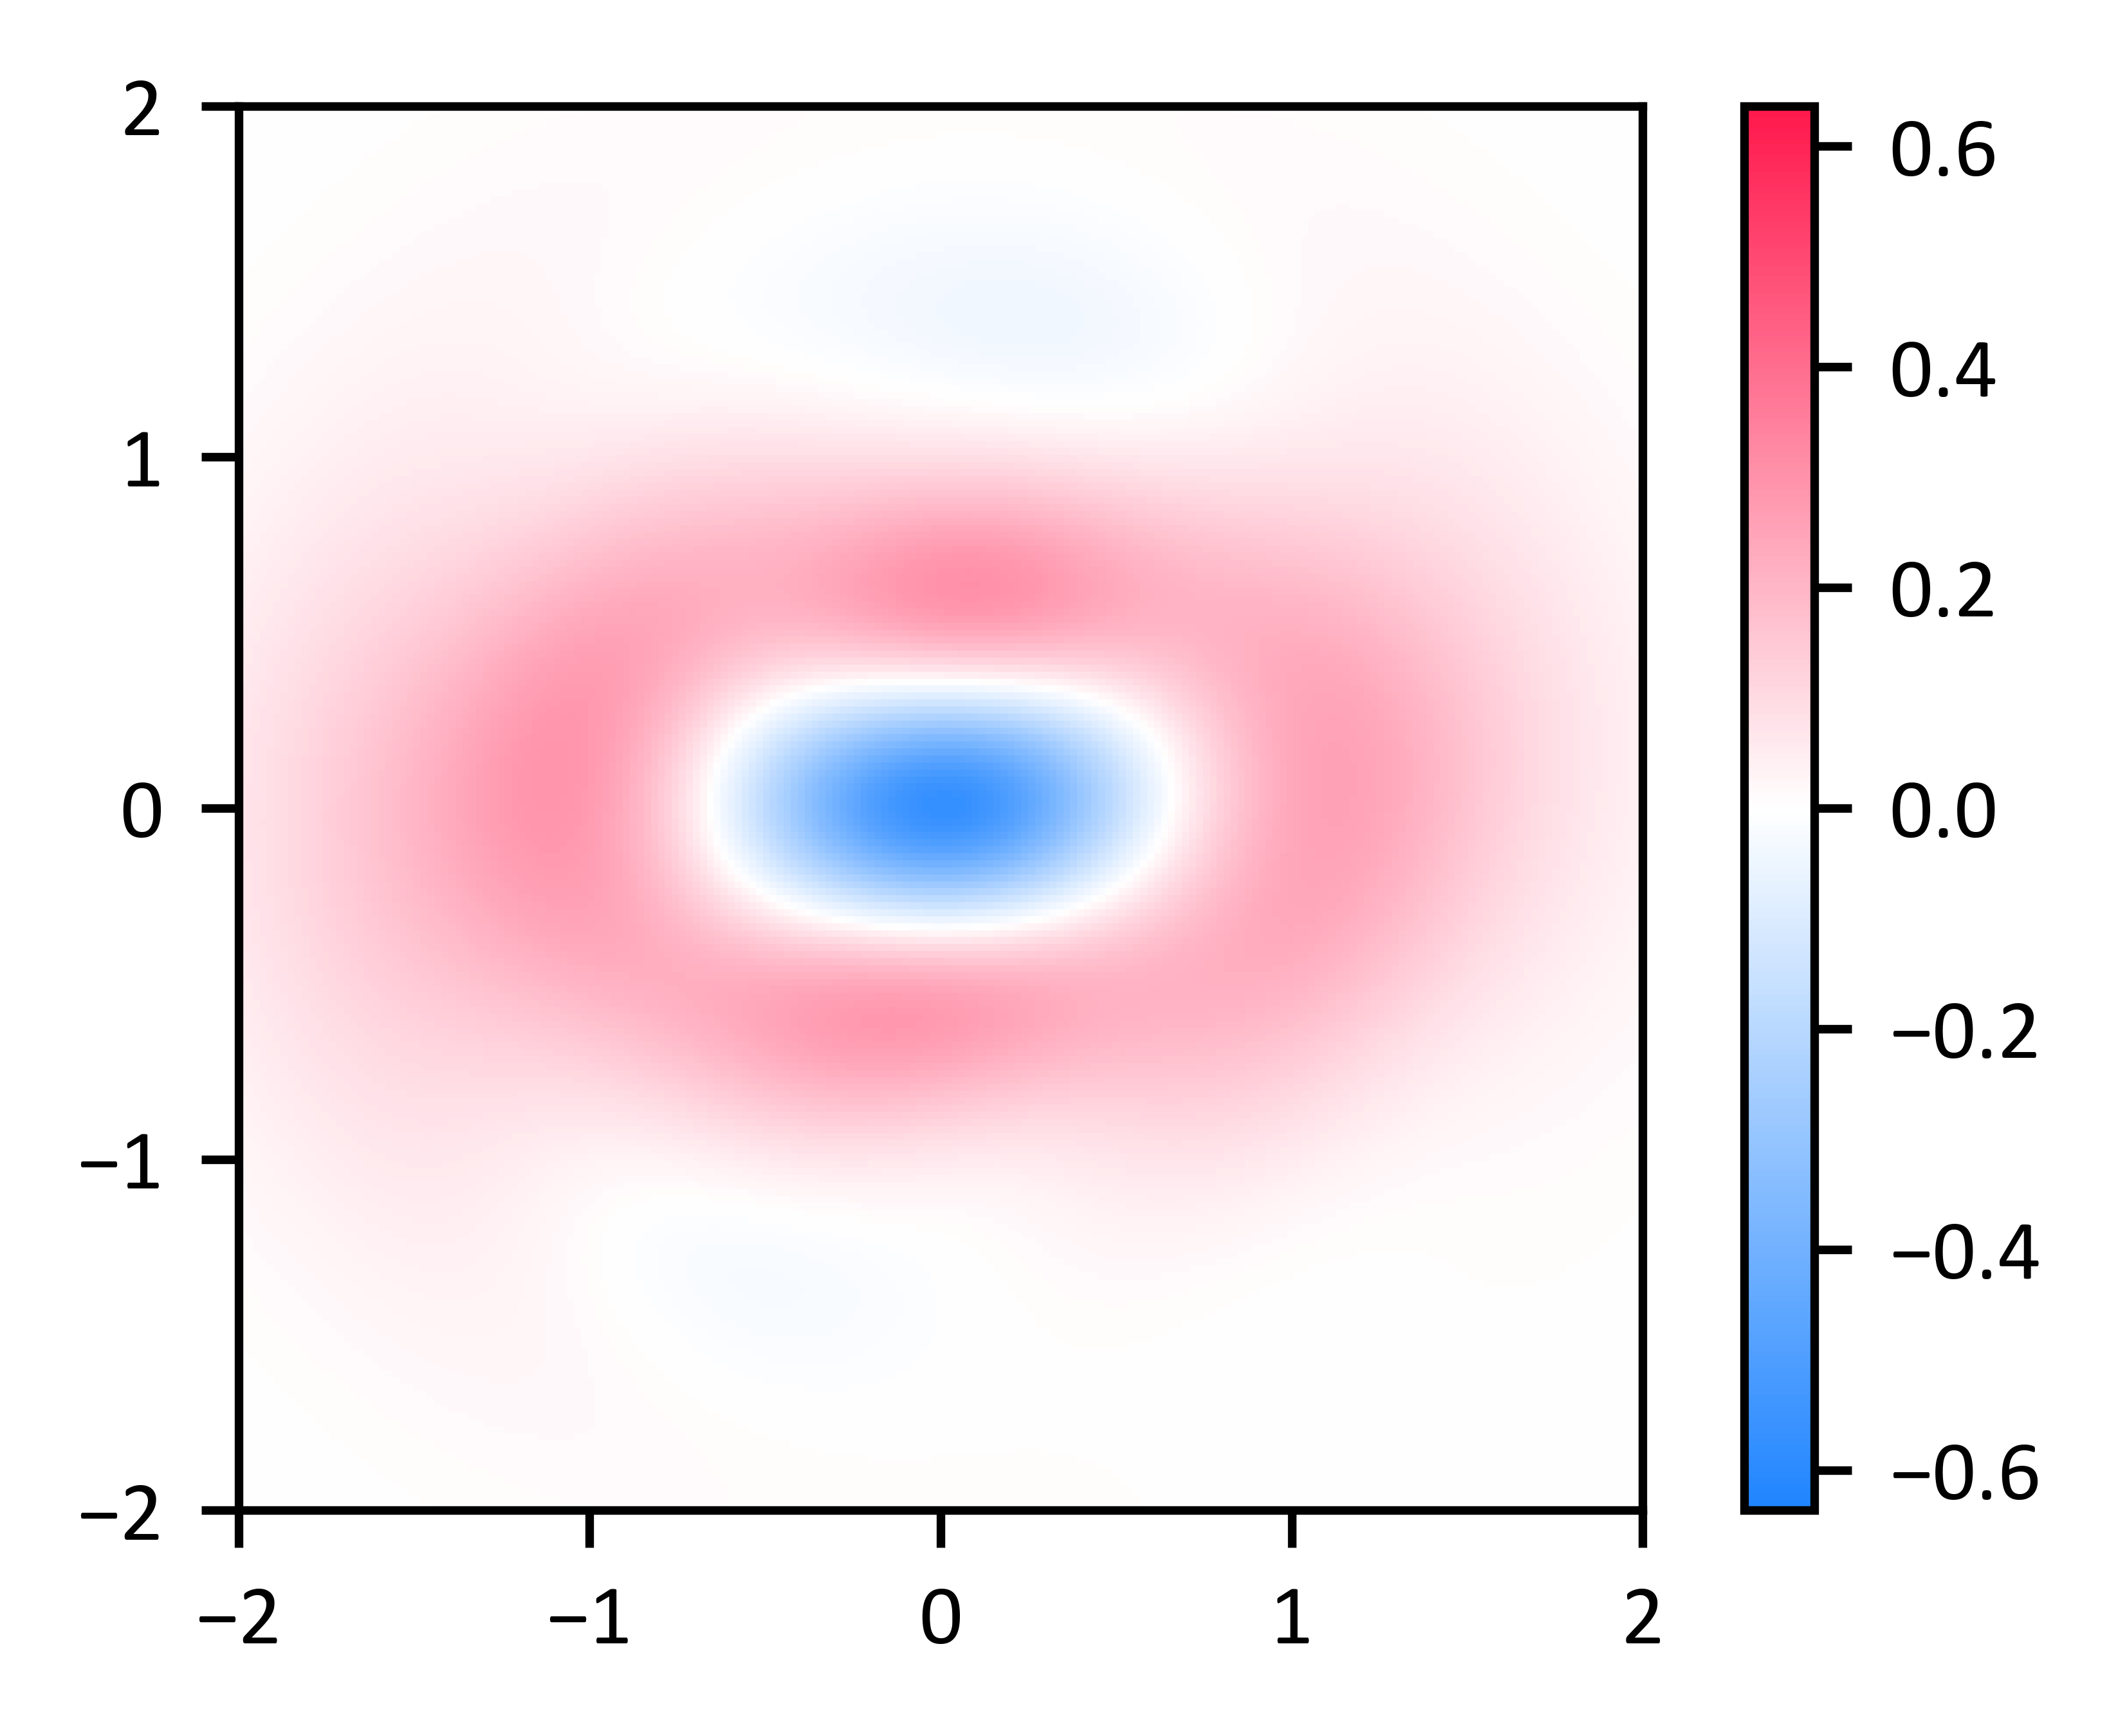

In [36]:
fg2 = plot_wigner(
    Qobj(W_corr_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]),
    wigner_custom_cmap,
)
fg2.savefig(save_figs_path + f"/Wcorr_T2={which_t2_to_plot}.pdf", dpi=1200)

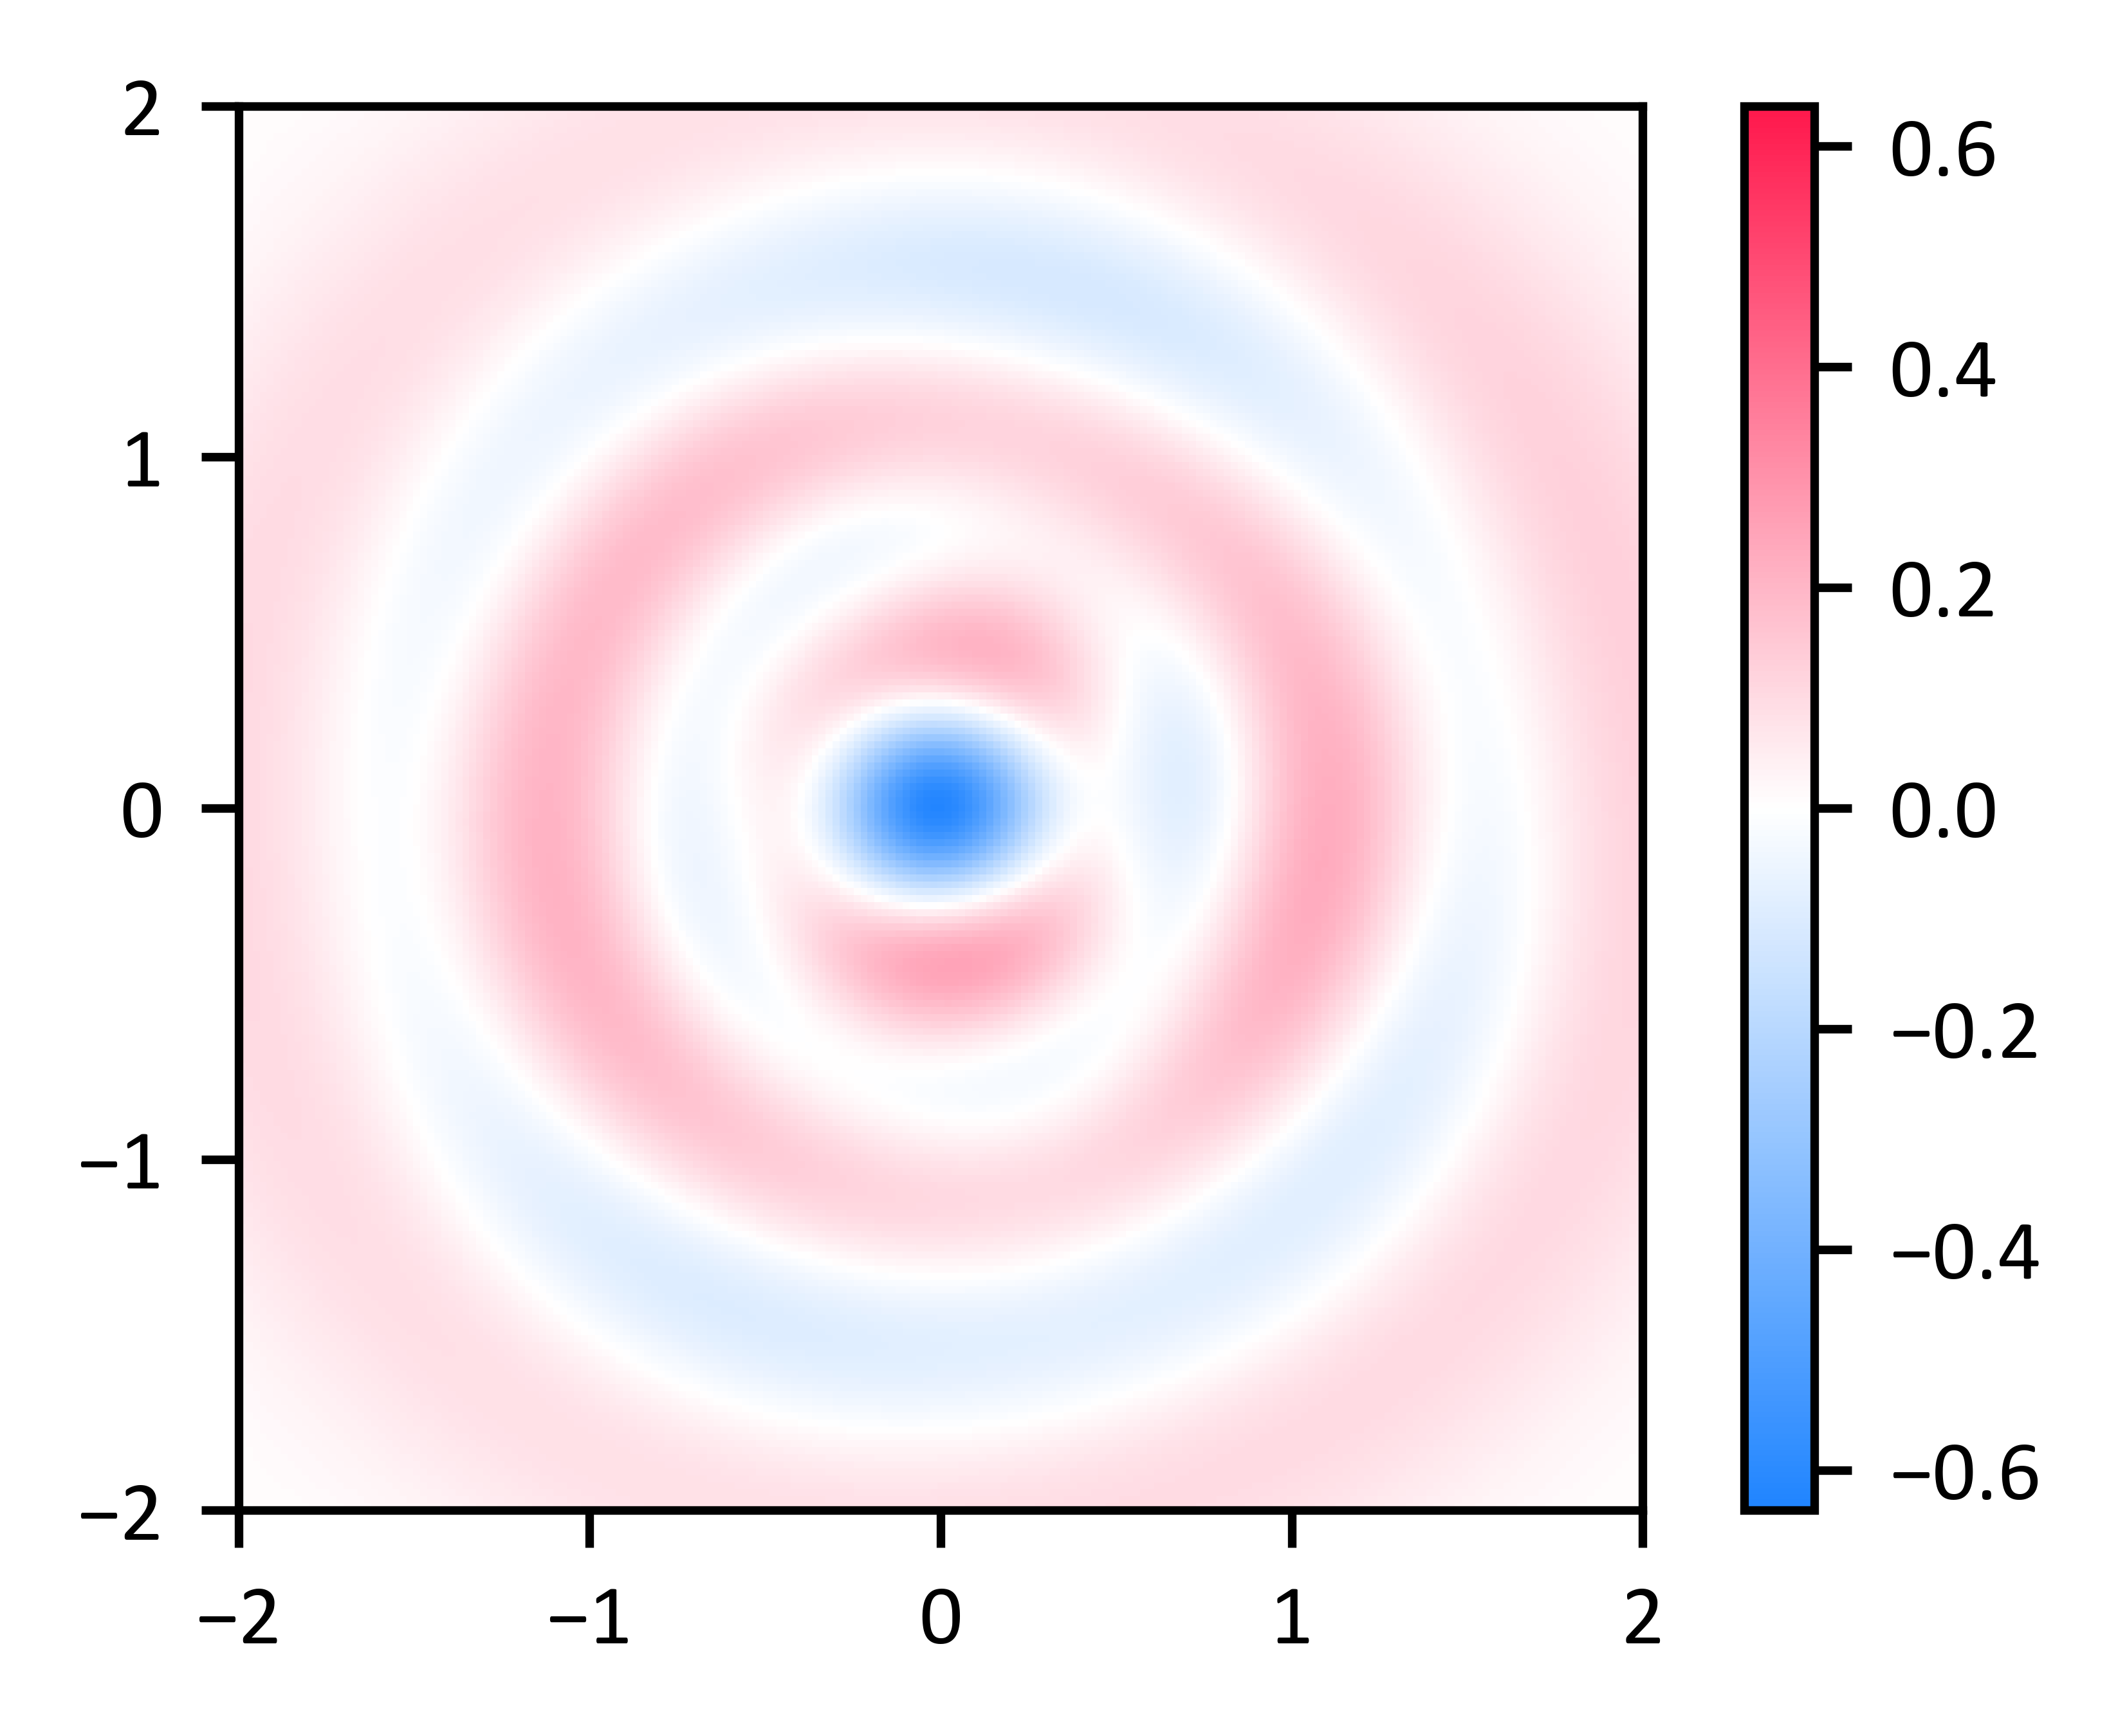

In [37]:
# Plot the corrected Wigner reconstructed
fg4 = plot_wigner(
    Qobj(W_norm_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]),
    wigner_custom_cmap,
)
fg4.savefig(save_figs_path + f"/Wnorm_T2={which_t2_to_plot}.pdf", dpi=1200)